In [1]:
import pandas as pd
import numpy as np
import itertools 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
codon_dict={'ttt':'F','ttc':'F','tta':'L','ttg':'L','ctt':'L','ctc':'L','cta':'L','ctg':'L','att':'I','atc':'I',
           'ata':'I','atg':'M','gtt':'V','gtc':'V','gta':'V','gtg':'V','tct':'S','tcc':'S','tca':'S','tcg':'S',
           'cct':'P','ccc':'P','cca':'P','ccg':'P','act':'T','acc':'T','aca':'T','acg':'T','gct':'A','gcc':'A',
           'gca':'A','gcg':'A','tat':'Y','tac':'Y','taa':'STOP','tag':'STOP','cat':'H','cac':'H','caa':'Q',
            'cag':'Q','aat':'N','aac':'N','aaa':'K','aag':'K','gat':'D','gac':'D','gaa':'E','gag':'E','tgt':'C',
            'tgc':'C','tga':'STOP','tgg':'W','cgt':'R','cgc':'R','cga':'R','cgg':'R','agt':'S','agc':'S','aga':'R',
            'agg':'R','ggt':'G','ggc':'G','gga':'G','ggg':'G','a':'a','c':'c','g':'g','t':'t'}

In [3]:
genomes = pd.read_pickle("../cryptic_data_analysis/data_tables/cryptic-analysis-group/GENOMES.pkl.gz")

In [4]:
samples = pd.read_pickle("../cryptic_data_analysis/data_tables/cryptic-analysis-group/SAMPLES.pkl.gz")

In [5]:
samples.reset_index(level=2, inplace=True)
samples.reset_index(level=1, inplace=True)
samples.reset_index(level=0, inplace=True)

In [6]:
genomes = pd.read_pickle("../cryptic_data_analysis/data_tables/cryptic-analysis-group/GENOMES.pkl.gz")
genomes.reset_index(level=0, inplace=True)
genomes=genomes.loc[genomes['BELONGS_GPI']==True]
phenotypes = pd.read_pickle("../cryptic_data_analysis/data_tables/cryptic-analysis-group/UKMYC_PHENOTYPES.pkl.gz")
phenotypes.reset_index(level=1, inplace=True)
phenotypes.reset_index(level=0, inplace=True)
phenotypes=phenotypes.loc[phenotypes['BELONGS_GPI']==True]
fq_phenotypes=phenotypes.loc[phenotypes.DRUG.isin(['LEV','MXF'])]
variants=pd.read_csv("hacky-gyrAB-hets/VARIANTS-gyr.csv.gz")
gyrase_mutations=pd.read_pickle("../cryptic_data_analysis/data_tables/cryptic-analysis-group/MUTATIONS_GPI.pkl.gz")
gyrase_mutations.reset_index(inplace=True)
gyrase_mutations=gyrase_mutations.loc[gyrase_mutations.GENE.isin(['gyrA','gyrB'])]

In [7]:
mutations=pd.read_csv("hacky-gyrAB-hets/MUTATIONS.csv.gz")

In [8]:
mutations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644527 entries, 0 to 1644526
Data columns (total 25 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   UNIQUEID                   1644527 non-null  object 
 1   GENE                       1644527 non-null  object 
 2   MUTATION                   1644527 non-null  object 
 3   POSITION                   1644527 non-null  float64
 4   AMINO_ACID_NUMBER          1594944 non-null  float64
 5   GENOME_INDEX               1312085 non-null  float64
 6   NUCLEOTIDE_NUMBER          1312085 non-null  float64
 7   REF                        334133 non-null   object 
 8   ALT                        334133 non-null   object 
 9   IS_SNP                     1644527 non-null  bool   
 10  IS_INDEL                   1644527 non-null  bool   
 11  IN_CDS                     1644527 non-null  bool   
 12  IN_PROMOTER                1644527 non-null  bool   
 13  IS_SYNONYMOU

In [9]:
mutations.UNIQUEID.nunique()

74369

In [10]:
mdr_phenotypes=phenotypes.loc[(phenotypes['DRUG']=='RIF')&(phenotypes['BINARY_PHENOTYPE']=='R')].UNIQUEID.unique()
len(mdr_phenotypes)

4685

In [11]:
variants.loc[(variants.ALT=='o')&(variants.UNIQUEID.isin(fq_phenotypes.UNIQUEID.to_list()))]

,UNIQUEID,VARIANT,IS_SNP,REF,ALT,GENOME_INDEX,GENE,ELEMENT_TYPE,MUTATION_TYPE,POSITION,...,INDEL_LENGTH,INDEL_1,INDEL_2,DP,COVERAGE,DPF,FRS,GT_CONF,GT_CONF_PERCENTILE,SITEID
7431,site.02.subj.0271.lab.2014232014.iso.1,7582a>o,True,a,o,7582,gyrA,GENE,SNP,94.0,...,NaN,None,None,223.0,0,1.0073,0.6278,400.899994,0.00,2
13501,site.02.subj.0071.lab.22A022.iso.1,7572t>o,True,t,o,7572,gyrA,GENE,SNP,91.0,...,NaN,None,None,124.0,0,1.0895,0.7258,383.579987,0.00,2
13502,site.02.subj.0071.lab.22A022.iso.1,7582a>o,True,a,o,7582,gyrA,GENE,SNP,94.0,...,NaN,None,None,121.0,0,1.0632,0.7190,379.070007,0.00,2
14498,site.02.subj.0031.lab.2014234024.iso.1,7892g>o,True,g,o,7892,gyrA,GENE,SNP,197.0,...,NaN,None,None,165.0,0,0.9811,0.5636,145.389999,0.00,2
14821,site.02.subj.0491.lab.231014-15.iso.1,7570c>o,True,c,o,7570,gyrA,GENE,SNP,90.0,...,NaN,None,None,224.0,0,0.9838,0.6964,611.280029,0.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446280,site.20.subj.SA00403702.lab.YA00135281.iso.1,7584a>o,True,a,o,7584,gyrA,GENE,SNP,95.0,...,NaN,None,None,131.0,0,1.1590,0.8931,814.840027,31.35,20
1446369,site.20.subj.SCH8373923.lab.YA00134600.iso.1,7584a>o,True,a,o,7584,gyrA,GENE,SNP,95.0,...,NaN,None,None,119.0,0,1.0583,0.8824,738.219971,12.89,20
1446761,site.20.subj.SA00377494.lab.YA00135266.iso.1,5520c>o,True,c,o,5520,gyrB,GENE,SNP,94.0,...,NaN,None,None,156.0,0,1.1892,0.5256,53.830002,0.00,20
1446762,site.20.subj.SA00377494.lab.YA00135266.iso.1,7222c>o,True,c,o,7222,gyrB,GENE,SNP,661.0,...,NaN,None,None,162.0,0,1.2349,0.5556,120.470001,0.00,20


In [12]:
variants.loc[variants.UNIQUEID=='site.04.subj.01528.lab.727421.iso.1'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 532467 to 532508
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UNIQUEID              42 non-null     object 
 1   VARIANT               42 non-null     object 
 2   IS_SNP                42 non-null     bool   
 3   REF                   42 non-null     object 
 4   ALT                   6 non-null      object 
 5   GENOME_INDEX          42 non-null     int64  
 6   GENE                  42 non-null     object 
 7   ELEMENT_TYPE          42 non-null     object 
 8   MUTATION_TYPE         42 non-null     object 
 9   POSITION              42 non-null     float64
 10  NUCLEOTIDE_NUMBER     42 non-null     float64
 11  AMINO_ACID_NUMBER     39 non-null     float64
 12  ASSOCIATED_WITH_GENE  42 non-null     bool   
 13  IN_PROMOTER           42 non-null     bool   
 14  IN_CDS                42 non-null     bool   
 15  IS_INDEL        

In [13]:
mutations_het=pd.read_csv("hacky-gyrAB-hets/MUTATIONS.csv.gz")
mutations_het.loc[(mutations_het.IS_FILTER_PASS==False)&(mutations_het.UNIQUEID.isin(fq_phenotypes.UNIQUEID.to_list()))]

,UNIQUEID,GENE,MUTATION,POSITION,AMINO_ACID_NUMBER,GENOME_INDEX,NUCLEOTIDE_NUMBER,REF,ALT,IS_SNP,...,IS_HET,IS_NULL,IS_FILTER_PASS,ELEMENT_TYPE,MUTATION_TYPE,INDEL_LENGTH,INDEL_1,INDEL_2,SITEID,NUMBER_NUCLEOTIDE_CHANGES
7429,site.02.subj.0271.lab.2014232014.iso.1,gyrA,D94O,94.0,94.0,NaN,NaN,gac,goc,True,...,False,False,False,GENE,AAM,NaN,NaN,NaN,2,1
13499,site.02.subj.0071.lab.22A022.iso.1,gyrA,S91O,91.0,91.0,NaN,NaN,tcg,ocg,True,...,False,False,False,GENE,AAM,NaN,NaN,NaN,2,1
13500,site.02.subj.0071.lab.22A022.iso.1,gyrA,D94O,94.0,94.0,NaN,NaN,gac,goc,True,...,False,False,False,GENE,AAM,NaN,NaN,NaN,2,1
14496,site.02.subj.0031.lab.2014234024.iso.1,gyrA,L197O,197.0,197.0,NaN,NaN,ctg,cto,True,...,False,False,False,GENE,AAM,NaN,NaN,NaN,2,1
14819,site.02.subj.0491.lab.231014-15.iso.1,gyrA,A90O,90.0,90.0,NaN,NaN,gcg,gog,True,...,False,False,False,GENE,AAM,NaN,NaN,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439517,site.20.subj.SA00403702.lab.YA00135281.iso.1,gyrA,S95O,95.0,95.0,NaN,NaN,agc,occ,True,...,False,False,False,GENE,AAM,NaN,NaN,NaN,20,2
1439605,site.20.subj.SCH8373923.lab.YA00134600.iso.1,gyrA,S95O,95.0,95.0,NaN,NaN,agc,occ,True,...,False,False,False,GENE,AAM,NaN,NaN,NaN,20,2
1439998,site.20.subj.SA00377494.lab.YA00135266.iso.1,gyrA,R252O,252.0,252.0,NaN,NaN,cga,coa,True,...,False,False,False,GENE,AAM,NaN,NaN,NaN,20,1
1440037,site.20.subj.SA00377494.lab.YA00135266.iso.1,gyrB,P94O,94.0,94.0,NaN,NaN,ccg,cog,True,...,False,False,False,GENE,AAM,NaN,NaN,NaN,20,1


In [36]:
mutations_het.loc[mutations_het.IS_INDEL==False]

,UNIQUEID,GENE,MUTATION,POSITION,AMINO_ACID_NUMBER,GENOME_INDEX,NUCLEOTIDE_NUMBER,REF,ALT,IS_SNP,...,IS_HET,IS_NULL,IS_FILTER_PASS,ELEMENT_TYPE,MUTATION_TYPE,INDEL_LENGTH,INDEL_1,INDEL_2,SITEID,NUMBER_NUCLEOTIDE_CHANGES
0,site.00.subj.PERU_02-R1267.lab.02-R1267.iso.1,gyrA,E21Q,21.0,21.0,NaN,NaN,gag,cag,True,...,False,False,True,GENE,AAM,NaN,NaN,NaN,0,1
1,site.00.subj.PERU_02-R1267.lab.02-R1267.iso.1,gyrA,S95T,95.0,95.0,NaN,NaN,agc,acc,True,...,False,False,True,GENE,AAM,NaN,NaN,NaN,0,1
2,site.00.subj.PERU_02-R1267.lab.02-R1267.iso.1,gyrA,A384V,384.0,384.0,NaN,NaN,gca,gta,True,...,False,False,True,GENE,AAM,NaN,NaN,NaN,0,1
3,site.00.subj.PERU_02-R1267.lab.02-R1267.iso.1,gyrA,I614I,614.0,614.0,NaN,NaN,att,atc,True,...,False,False,True,GENE,AAM,NaN,NaN,NaN,0,1
4,site.00.subj.PERU_02-R1267.lab.02-R1267.iso.1,gyrA,G668D,668.0,668.0,NaN,NaN,ggc,gac,True,...,False,False,True,GENE,AAM,NaN,NaN,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644522,site.ENA.subj.SAMN05328090.lab.1.iso.1,gyrA,E21Q,21.0,21.0,NaN,NaN,gag,cag,True,...,False,False,True,GENE,AAM,NaN,NaN,NaN,ENA,1
1644523,site.ENA.subj.SAMN05328090.lab.1.iso.1,gyrA,A90V,90.0,90.0,NaN,NaN,gcg,gtg,True,...,False,False,True,GENE,AAM,NaN,NaN,NaN,ENA,1
1644524,site.ENA.subj.SAMN05328090.lab.1.iso.1,gyrA,S91P,91.0,91.0,NaN,NaN,tcg,ccg,True,...,False,False,True,GENE,AAM,NaN,NaN,NaN,ENA,1
1644525,site.ENA.subj.SAMN05328090.lab.1.iso.1,gyrA,S95T,95.0,95.0,NaN,NaN,agc,acc,True,...,False,False,True,GENE,AAM,NaN,NaN,NaN,ENA,1


In [14]:
#variants.loc[(variants.FRS<0.9)&(variants.DP<200)].hist(column='DP', bins=50)

In [15]:
pm=pd.merge(fq_phenotypes, variants, how='left', on=['UNIQUEID'])
pm_het=pm.loc[(pm.ALT=='o')]

In [39]:
pm.UNIQUEID.nunique()

12354

In [37]:
#/well/bag/pfowler/cryptic/dat/CRyPTIC2/V2/04/00101/629761/1/regenotyped
filestrings=[]
loc_string=[]
gi=[]
ref=[]
alt=[]
mut=[]
gene=[]
u=[]
for i in pm_het.UNIQUEID.unique():
    for ii in pm_het.loc[(pm_het.UNIQUEID==i)].VARIANT.unique():
        p=pm_het.loc[(pm_het.UNIQUEID==i)&(pm_het.VARIANT==ii)].POSITION.to_list()[0]
        g=pm_het.loc[(pm_het.UNIQUEID==i)&(pm_het.VARIANT==ii)].GENE.to_list()[0]
        gene.append(g)
        ref.append(pm_het.loc[(pm_het.UNIQUEID==i)&(pm_het.VARIANT==ii)].REF.to_list()[0])
        alt.append(pm_het.loc[(pm_het.UNIQUEID==i)&(pm_het.VARIANT==ii)].ALT.to_list()[0])
        gi.append(pm_het.loc[(pm_het.POSITION==p)&(pm_het.GENE==g)&(pm_het.UNIQUEID==i)&(pm_het.VARIANT==ii)].GENOME_INDEX.to_list()[0])
        u.append(i)
        mut.append(ii)
        filestrings.append('../../pfowler/cryptic/dat/CRyPTIC2/V2/'+i.split('.')[1]+'/'+i.split('.')[3]+'/'+i.split('.')[5]+'/'+i.split('.')[7]+'/regenotyped/'+i+'.v0.8.3.regenotyped.vcf.gz')
        loc_string.append(i+'.v0.8.3.regenotyped.vcf.gz')
hets_df = pd.DataFrame({'UNIQUEID':u,
                    'VCF_FILE':filestrings,
                    'LOC_STRING':loc_string,
                    'GENE':gene, 
                    'MUTATION':mut, 
                    'REF':ref, 
                    'ALT':alt, 
                    'GENOME_INDEX':gi})

hets_df.to_csv('gyrase_het_muts.csv')                    
                    

(array([ 48050.,  16483.,   7260.,  37701.,  44977.,  24534., 342809.,
        180058., 201122., 362719.]),
 array([  8. ,  31.3,  54.6,  77.9, 101.2, 124.5, 147.8, 171.1, 194.4,
        217.7, 241. ]),
 <BarContainer object of 10 artists>)

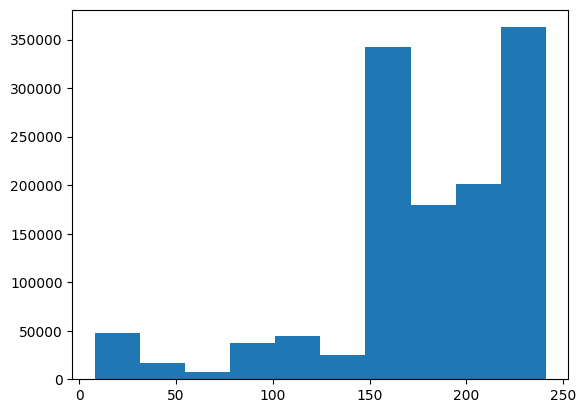

In [135]:


import pandas as pd
import numpy as np
import allel

def list_sum(mylist):
    s = 0
    for x in mylist:
        if x > 0:
            s = s + x
    return s


variants=[]
reads=[]
frs=[]
frs_fail=[]
dp_fail=[]
gcp_fail=[]
highest_alt=[]
a=[]
c=[]
g=[]
t=[]

callset = allel.read_vcf('site.05.subj.LS-1046.lab.LS-10565-18.iso.1.v0.8.3.regenotyped.vcf.gz', 
                         fields=['calldata/COV',
         'calldata/DP',
         'calldata/DPF',
         'calldata/FRS',
         'calldata/GT',
         'calldata/GT_CONF',
         'calldata/GT_CONF_PERCENTILE',
         'variants/ALT',
         'variants/CHROM',
         'variants/FILTER_MIN_DP',
         'variants/FILTER_MIN_FRS',
     'variants/FILTER_MIN_GCP',
     'variants/FILTER_PASS',
     'variants/FILTER_mask-compass',
     'variants/ID',
     'variants/POS',
     'variants/QUAL',
     'variants/REF',
     'variants/altlen',
     'variants/is_snp',
     'variants/numalt'])

pos=[]
reads=[]

for i in callset['calldata/DP']:
        if callset['calldata/DP'][i][0]>0:
            reads.append(callset['calldata/DP'][i][0][0])





plt.hist(reads, bins=10) 

In [193]:
#hets_variants=pd.merge(hets, variants, how='left', on=['UNIQUEID','GENOME_INDEX'])

In [16]:
hets=pd.read_csv('gyrase_het_muts_complete.csv')
#hets.loc[hets.GENOME_INDEX==7582].hist(column='%_g')

In [17]:
import math
depth_list=[]
for i in hets['DP'].astype('str'):
    if i != 'nan':
        depth_list.append(int(i[1:-1]))
    else:
        depth_list.append(np.nan)
depth_list
hets['DP']=depth_list

In [18]:
alt_n=[]
ref_n=[]
for ind, row in hets.iterrows():    
    if row['HIGHEST_ALT']=='a':
        alt_n.append(round(row['%_a']*row['DP'],0))
    elif row['HIGHEST_ALT']=='c':
        alt_n.append(round(row['%_c']*row['DP'],0))
    elif row['HIGHEST_ALT']=='g':
        alt_n.append(round(row['%_g']*row['DP'],0))
    elif row['HIGHEST_ALT']=='t':
        alt_n.append(round(row['%_t']*row['DP'],0))
    else:
        alt_n.append(np.nan)
for ind, row in hets.iterrows():    
    if row['REF']=='a':
        ref_n.append(round(row['%_a']*row['DP'],0))
    elif row['REF']=='c':
        ref_n.append(round(row['%_c']*row['DP'],0))
    elif row['REF']=='g':
        ref_n.append(round(row['%_g']*row['DP'],0))
    elif row['REF']=='t':
        ref_n.append(round(row['%_t']*row['DP'],0))
    else:
        ref_n.append(np.nan)

hets['ALT_N_READS']=alt_n
hets['REF_N_READS']=ref_n
        


In [19]:
hets['FRS_ALT']=hets.ALT_N_READS/hets.DP
#remove mutations where alt or reference have fewer than 2 reads
hets_2=hets.loc[(hets.DP_FAIL==False)]
#hets_2=hets



In [59]:
hets_2.FRS_ALT

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
4681    0.111111
4682    0.111111
4683         NaN
4684         NaN
4685         NaN
Name: FRS_ALT, Length: 4639, dtype: float64

In [20]:
hets_2p=pd.merge(hets_2, variants, on=['UNIQUEID','GENOME_INDEX'])

In [70]:
testing=hets_2p.loc[-(hets_2p.FRS_ALT.isna())]

In [76]:
testing.loc[testing.DP_x>2].UNIQUEID.nunique()

909

In [21]:
list0=[]
i=7302
while i < 9819:
    list0.append(i)
    i += 3
    
list1=[]
i=7303
while i < 9819:
    list1.append(i)
    i += 3
    
list2=[]
i=7304
while i < 9819:
    list2.append(i)
    i += 3
    
gyra_codon_position_dict={0:list0,
                   1:list1,
                   2:list2}

In [22]:
list0=[]
i=5240
while i < 7268:
    list0.append(i)
    i += 3
    
list1=[]
i=5241
while i < 7268:
    list1.append(i)
    i += 3
    
list2=[]
i=5242
while i < 7268:
    list2.append(i)
    i += 3
    
gyrb_codon_position_dict={0:list0,
                   1:list1,
                   2:list2}

In [41]:
hets_2p=hets_2p.loc[hets_2p.IN_PROMOTER==False]
uid=[]
alt_reads=[]
ref_codon=[]
new_codon=[]
depth=[]
gene=[]
pos=[]
frs=[]
for ind, row in hets_2p.iterrows():
    rc=mutations_het.loc[(mutations_het.POSITION==row['POSITION'])&(mutations_het.GENE==row['GENE_x'])&(mutations_het.IS_SNP==True)].REF.to_list()[0]
    if row['GENE_x']=='gyrA':
        if row['GENOME_INDEX'] in gyra_codon_position_dict[0]:
            x=0
        elif row['GENOME_INDEX'] in gyra_codon_position_dict[1]:
            x=1
        elif row['GENOME_INDEX'] in gyra_codon_position_dict[2]:
            x=2
    elif row['GENE_x']=='gyrB':
        if row['GENOME_INDEX'] in gyrb_codon_position_dict[0]:
            x=0
        elif row['GENOME_INDEX'] in gyrb_codon_position_dict[1]:
            x=1
        elif row['GENOME_INDEX'] in gyrb_codon_position_dict[2]:
            x=2

    #print(ref)
    if round(row['%_a']*row['DP_x'],0)>=2 and row['REF_x']!='a' and row['%_a']<0.9:
        uid.append(row['UNIQUEID'])
        gene.append(row['GENE_x'])
        pos.append(row['POSITION'])
        ac=rc[:x] + 'a' + rc[x + 1:]
        new_codon.append(ac)
        ref_codon.append(rc)
        alt_reads.append(round(row['%_a']*row['DP_x'],0))
        depth.append(row['DP_x'])
        frs.append(row['%_a'])
    if round(row['%_c']*row['DP_x'],0)>=2 and row['REF_x']!='c' and row['%_c']<0.9:
        uid.append(row['UNIQUEID'])
        gene.append(row['GENE_x'])
        pos.append(row['POSITION'])
        ac=rc[:x] + 'c' + rc[x + 1:]
        new_codon.append(ac)
        ref_codon.append(rc)
        alt_reads.append(round(row['%_c']*row['DP_x'],0))
        depth.append(row['DP_x'])
        frs.append(row['%_c'])
    if round(row['%_g']*row['DP_x'],0)>=2 and row['REF_x']!='g' and row['%_g']<0.9:
        uid.append(row['UNIQUEID'])
        gene.append(row['GENE_x'])
        pos.append(row['POSITION'])
        ac=rc[:x] + 'g' + rc[x + 1:]
        new_codon.append(ac)
        ref_codon.append(rc)
        alt_reads.append(round(row['%_g']*row['DP_x'],0))
        depth.append(row['DP_x'])
        frs.append(row['%_g'])
    if round(row['%_t']*row['DP_x'],0)>=2 and row['REF_x']!='t' and row['%_t']<0.9:
        uid.append(row['UNIQUEID'])
        gene.append(row['GENE_x'])
        pos.append(row['POSITION'])
        ac=rc[:x] + 't' + rc[x + 1:]
        new_codon.append(ac)
        ref_codon.append(rc)
        alt_reads.append(round(row['%_t']*row['DP_x'],0))
        depth.append(row['DP_x'])
        frs.append(row['%_t'])
        
    
final_hets_df=pd.DataFrame(list(zip(uid,gene,pos,ref_codon,new_codon,alt_reads,depth,frs)),
                           columns=['UNIQUEID','GENE','POSITION','REF_CODON','ALT_CODON','ALT_READS','DEPTH','FRS'])

mutation=[]
for ind, row in final_hets_df.iterrows():
    mutation.append(row['GENE']+codon_dict[row['REF_CODON']]+str(int(row['POSITION']))+codon_dict[row['ALT_CODON']])
    
final_hets_df['HET_MUTATION']=mutation
final_hets_df.to_csv('het_mutations_dp2.csv')
final_hets_df

,UNIQUEID,GENE,POSITION,REF_CODON,ALT_CODON,ALT_READS,DEPTH,FRS,HET_MUTATION
0,site.06.subj.RLH_0295-14.lab.06MIL0281.iso.1,gyrA,124.0,ccg,gcg,2.0,11.0,0.181818,gyrAP124A
1,site.10.subj.YA00026185.lab.YA00026185.iso.1,gyrA,254.0,cgc,tgc,12.0,114.0,0.105263,gyrAR254C
2,site.06.subj.OIC-1182.lab.06MIL1094.iso.1,gyrA,123.0,cca,ccc,3.0,36.0,0.085714,gyrAP123P
3,site.06.subj.06TB_0280.lab.06MIL0871.iso.1,gyrA,696.0,gcc,acc,2.0,18.0,0.111111,gyrAA696T
4,site.06.subj.AF11681.lab.06MIL1559.iso.1,gyrB,436.0,ggt,ggc,5.0,50.0,0.100000,gyrBG436G
...,...,...,...,...,...,...,...,...,...
1213,site.08.subj.02TB0158.lab.17101.iso.1,gyrA,473.0,gag,gaa,4.0,17.0,0.235294,gyrAE473E
1214,site.08.subj.02TB0158.lab.17101.iso.1,gyrA,474.0,cgg,cgt,4.0,15.0,0.266667,gyrAR474R
1215,site.08.subj.02TB0158.lab.17101.iso.1,gyrA,476.0,cgt,cgc,4.0,15.0,0.266667,gyrAR476R
1216,site.08.subj.02TB0158.lab.17101.iso.1,gyrA,477.0,ggg,gcg,4.0,15.0,0.266667,gyrAG477A


In [717]:
final_hets_df['HET_MUTATION'].value_counts()

gyrAD94G     136
gyrAA90V      98
gyrAA384V     45
gyrBM291I     44
gyrAD94A      42
            ... 
gyrAP472P      1
gyrBT433T      1
gyrAI486L      1
gyrBP628P      1
gyrAD415D      1
Name: HET_MUTATION, Length: 405, dtype: int64

In [43]:
final_hets_df.UNIQUEID.nunique()

641

In [119]:
final_hets_df.

,UNIQUEID,GENE,POSITION,REF_CODON,ALT_CODON,ALT_READS,DEPTH,FRS,HET_MUTATION
0,site.06.subj.RLH_0295-14.lab.06MIL0281.iso.1,gyrA,124.0,ccg,gcg,2.0,11.0,0.181818,gyrAP124A
1,site.10.subj.YA00026185.lab.YA00026185.iso.1,gyrA,254.0,cgc,tgc,12.0,114.0,0.105263,gyrAR254C
2,site.06.subj.OIC-1182.lab.06MIL1094.iso.1,gyrA,123.0,cca,ccc,3.0,36.0,0.085714,gyrAP123P
3,site.06.subj.06TB_0280.lab.06MIL0871.iso.1,gyrA,696.0,gcc,acc,2.0,18.0,0.111111,gyrAA696T
4,site.06.subj.AF11681.lab.06MIL1559.iso.1,gyrB,436.0,ggt,ggc,5.0,50.0,0.100000,gyrBG436G
...,...,...,...,...,...,...,...,...,...
1213,site.08.subj.02TB0158.lab.17101.iso.1,gyrA,473.0,gag,gaa,4.0,17.0,0.235294,gyrAE473E
1214,site.08.subj.02TB0158.lab.17101.iso.1,gyrA,474.0,cgg,cgt,4.0,15.0,0.266667,gyrAR474R
1215,site.08.subj.02TB0158.lab.17101.iso.1,gyrA,476.0,cgt,cgc,4.0,15.0,0.266667,gyrAR476R
1216,site.08.subj.02TB0158.lab.17101.iso.1,gyrA,477.0,ggg,gcg,4.0,15.0,0.266667,gyrAG477A


In [92]:
lev_p=pd.merge(fq_phenotypes.loc[fq_phenotypes.DRUG=='LEV'], final_hets_df, on='UNIQUEID', how='left')
mxf_p=pd.merge(fq_phenotypes.loc[fq_phenotypes.DRUG=='MXF'], final_hets_df, on='UNIQUEID', how='left')

In [93]:
l_r_tot=lev_p.loc[(lev_p.BINARY_PHENOTYPE=='R')].UNIQUEID.nunique()
l_r_het=lev_p.loc[-(lev_p.HET_MUTATION.isna())&(lev_p.BINARY_PHENOTYPE=='R')].UNIQUEID.nunique()

l_s_tot=lev_p.loc[(lev_p.BINARY_PHENOTYPE=='S')].UNIQUEID.nunique()
l_s_het=lev_p.loc[-(lev_p.HET_MUTATION.isna())&(lev_p.BINARY_PHENOTYPE=='S')].UNIQUEID.nunique()

In [94]:
m_r_tot=mxf_p.loc[(mxf_p.BINARY_PHENOTYPE=='R')].UNIQUEID.nunique()
m_r_het=mxf_p.loc[-(mxf_p.HET_MUTATION.isna())&(mxf_p.BINARY_PHENOTYPE=='R')].UNIQUEID.nunique()

m_s_tot=mxf_p.loc[(mxf_p.BINARY_PHENOTYPE=='S')].UNIQUEID.nunique()
m_s_het=mxf_p.loc[-(mxf_p.HET_MUTATION.isna())&(mxf_p.BINARY_PHENOTYPE=='S')].UNIQUEID.nunique()

In [97]:
def z_test(sample_success_a, sample_size_a, sample_success_b, sample_size_b):
    # can we assume anything from our sample
    significance = 0.05

    # check our sample against Ho for Ha != Ho
    successes = np.array([sample_success_a, sample_success_b])
    samples = np.array([sample_size_a, sample_size_b])
    # note, no need for a Ho value here - it's derived from the other parameters
    stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')
    # report
    print('z_stat: %0.5f, p_value: %0.5f' % (stat, p_value))
    #if p_value > significance:
        #print ("Fail to reject the null hypothesis - we have nothing else to say")
    #else:
        #print ("Reject the null hypothesis - suggest the alternative hypothesis is true")
    return p_value

In [99]:
import statsmodels
from statsmodels.stats.proportion import proportions_ztest
z_test(m_r_het, m_r_tot, m_s_het, m_r_tot)

z_test(l_r_het, l_r_tot, l_s_het, l_r_tot)

z_stat: -8.86949, p_value: 0.00000
z_stat: -4.11914, p_value: 0.00004


3.8029021254416194e-05

z_stat: -4.11914, p_value: 0.00004
z_stat: -8.86949, p_value: 0.00000


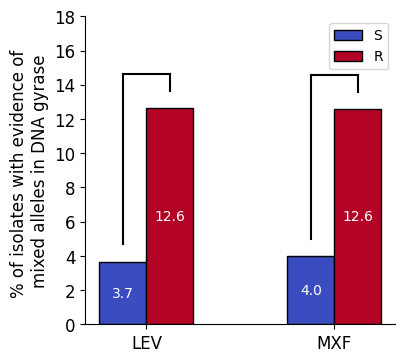

In [115]:

#plt.bar(unique(mut_counts).astype('str'),counts)
fig, ax = plt.subplots(figsize=(4,4))
labels = ['LEV','MXF']
s=[(l_s_het/l_s_tot)*100, (m_s_het/m_s_tot)*100]
r=[(l_r_het/l_r_tot)*100, (m_r_het/m_r_tot)*100]
z=[]
    
z.append(z_test(l_r_het, l_r_tot, l_s_het, l_r_tot))
z.append(z_test(m_r_het, m_r_tot, m_s_het, m_r_tot))
    
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars
    

#rects1 = ax.bar(x - width, FQ, width, label='Fluoroquinolone Resistant', color='#bc5090',edgecolor='k')
rects2 = ax.bar(x - width/2, s, width, label='S', color='#3b4cc0', edgecolor='black')
rects3 = ax.bar(x + width/2, r, width, label='R', color='#b40426',edgecolor='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% of isolates with evidence of \nmixed alleles in DNA gyrase', size=12)
ax.set_xticks(x)
ax.set_ylim(0,18)
ax.bar_label(rects2, fmt='%.1f', label_type='center', color='w')
ax.bar_label(rects3, fmt='%.1f', label_type='center', color='w')
    


if z[0]<=0.05:
    plt.plot([x[0]-width/2, x[0]+width/2], [r[0]+2, r[0]+2],color="k")
    plt.plot([x[0]-width/2, x[0]-width/2], [s[0]+1, r[0]+2],color="k")
    plt.plot([x[0]+width/2, x[0]+width/2], [r[0]+1, r[0]+2],color="k")
if z[1]<=0.05:
    plt.plot([x[1]-width/2, x[1]+width/2], [r[1]+2, r[1]+2],color="k")
    plt.plot([x[1]-width/2, x[1]-width/2], [s[1]+1, r[1]+2],color="k")
    plt.plot([x[1]+width/2, x[1]+width/2], [r[1]+1, r[1]+2],color="k")

for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
ax.set_xticklabels(labels)
ax.legend(loc='upper right')
ax.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('r_vs_s_mixed_alleles.png',dpi=300, transparent=True, bbox_inches='tight')

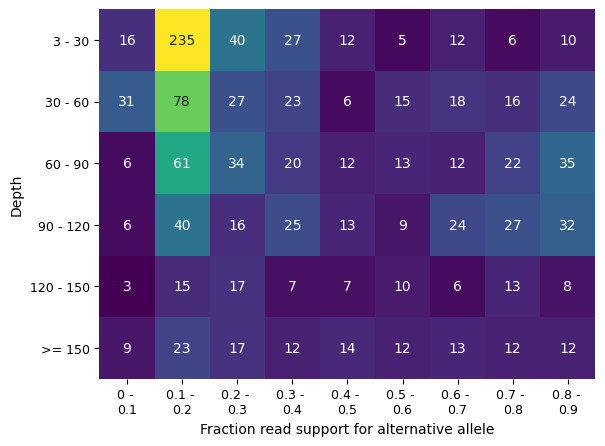

In [723]:
#group fraction read support and depth
final_hets_df['ALT_FRS_grouped']=pd.cut(np.array(final_hets_df.FRS), pd.IntervalIndex.from_tuples(
                            [(0, 0.1), (0.1,0.2), (0.2, 0.3), (0.3,0.4),(0.4,0.5),(0.5,0.6),
                             (0.6,0.7),(0.7,0.8),(0.8,0.9)]))
final_hets_df['DEPTH_grouped']=pd.cut(np.array(final_hets_df.DEPTH), bins= pd.IntervalIndex.from_tuples(
                            [(0, 30),(30,60), (60,90), (90,120), (120,150),  (150, 1000)]))
#pivot table for heatmap
x=final_hets_df['ALT_FRS_grouped'].to_list()
y=final_hets_df['DEPTH_grouped'].to_list()
df = pd.DataFrame([x,y]).T
df.columns=['ALT_FRS','DEPTH']
df['count'] = 1
df2 = df.groupby(['ALT_FRS','DEPTH'], as_index=False).count()
df_p = pd.pivot_table(df2,'count','DEPTH','ALT_FRS')
#heatmap
fig, ax = plt.subplots()
ax=sns.heatmap(df_p, cmap='viridis', annot=True, fmt='.0f', vmax=100, cbar=False)
ax.set_xticklabels(['0 - \n0.1', '0.1 - \n0.2', '0.2 - \n0.3', '0.3 - \n0.4','0.4 - \n0.5',
                   '0.5 - \n0.6', '0.6 - \n0.7', '0.7 - \n0.8','0.8 - \n0.9'], rotation=0, size=9)
ax.set_yticklabels(['3 - 30', '30 - 60', '60 - 90', '90 - 120','120 - 150',
                   '>= 150'], rotation=0, size=9)
plt.ylabel('Depth')
plt.xlabel('Fraction read support for alternative allele')
plt.savefig('FRSvDEPTH_heatmap.png', dpi=300, transparent=True, bbox_inches='tight')

In [731]:
drug_dict={'LEV':'Levofloxacin','MXF':'Moxifloxacin'}

In [732]:
def frs_boxplot(mutation, drug):
    '''make MIC vs FRS distribution plots and calculate pearsons r correlation coefficient'''
    
    
    import seaborn as sns


    hets_mic=pd.merge(final_hets_df, fq_phenotypes, how='left', on='UNIQUEID')
    hets_mic=hets_mic.loc[(hets_mic.DRUG==drug)&(hets_mic.PHENOTYPE_QUALITY!='LOW')&(hets_mic.HET_MUTATION==mutation)]



    variant_logmic=[]
    variant_frs=[]

    for i in hets_mic['LOG2MIC'].to_list(): 
        variant_logmic.append(i)
    for i in hets_mic['FRS'].to_list(): 
        variant_frs.append(i)

    
    d = {'LOG2MIC':variant_logmic,'FRS_ALT':variant_frs}
    df=pd.DataFrame(d)
    df=df.loc[df.FRS_ALT<0.9]
    df=df.round({'FRS_ALT': 1})
    print(df)
    fig, ax = plt.subplots(figsize=(df.FRS_ALT.nunique()/1.5,4))

    props = dict(linestyle='-', linewidth=0.5)

    if len(df.loc[df.FRS_ALT==0.0])>0:
        bp=sns.swarmplot(x = "FRS_ALT", y = "LOG2MIC",data = df, color = 'k')
    else:
        bp=sns.swarmplot(x = "FRS_ALT", y = "LOG2MIC",data = df, color = 'k')
        
    bp=sns.violinplot(x = "FRS_ALT", y = "LOG2MIC",data = df, color = 'lightgray',inner=None, scale='count')            

    
    bp.set_ylabel(drug_dict[drug]+' MIC')
    bp.set_xlabel('Fraction read support for '+mutation[0:4]+' '+mutation[4:])
    plt.suptitle("")
    plt.title("")
    if drug=='MXF':
        plt.yticks(df.LOG2MIC.sort_values().dropna().unique(), 
               ['<=0.06','0.12','0.25','0.5','1','2','4','>4'], rotation=0)
    elif drug=='LEV':
        plt.yticks(df.LOG2MIC.sort_values().dropna().unique(), 
               ['<=0.12','0.25','0.5','1','2','4','8', '>8'], rotation=0)

    for pos in ['right', 'top']: 
        plt.gca().spines[pos].set_visible(False) 
    
    axes = plt.gca()
    


    y_min, y_max = axes.get_ylim()
    x_min, x_max = axes.get_xlim()
    
    axes.text(x_max-1, y_min+0.5, 'R = '+str(round(df['FRS_ALT'].corr(df['LOG2MIC']),3)))


    plt.savefig('FRSvMIC_box_'+mutation+'_'+drug+'.png', dpi=300, transparent=True, bbox_inches='tight')




    LOG2MIC  FRS_ALT
0      1.00      0.1
1      1.00      0.1
2      2.00      0.7
3       NaN      0.8
4      1.00      0.7
..      ...      ...
67     3.00      0.9
68    -3.06      0.7
69     2.00      0.3
70     2.00      0.5
71     4.00      0.2

[72 rows x 2 columns]
     LOG2MIC  FRS_ALT
0        3.0      0.1
1        2.0      0.3
2        3.0      0.8
3        3.0      0.2
4        4.0      0.3
..       ...      ...
101      3.0      0.8
102      3.0      0.8
103      2.0      0.8
104      4.0      0.7
105      4.0      0.1

[106 rows x 2 columns]
    LOG2MIC  FRS_ALT
0     -1.00      0.1
1       NaN      0.8
2      2.00      0.9
3      3.00      0.3
4      3.00      0.9
..      ...      ...
64    -2.00      0.3
65    -4.06      0.7
66     2.00      0.3
67     2.00      0.5
68     3.00      0.2

[69 rows x 2 columns]
    LOG2MIC  FRS_ALT
0       2.0      0.1
1       2.0      0.8
2       3.0      0.2
3       3.0      0.3
4       2.0      0.1
..      ...      ...
94      3.0    

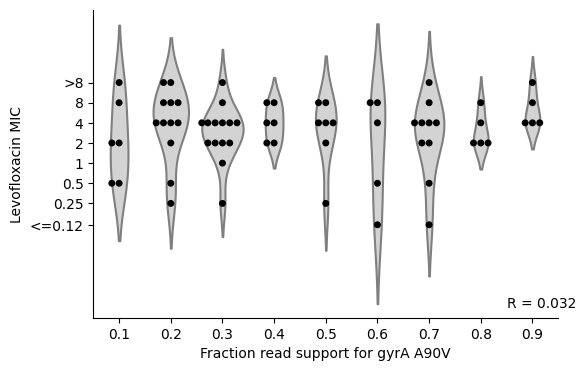

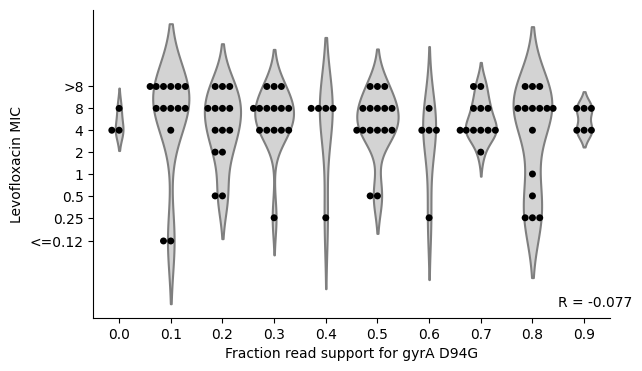

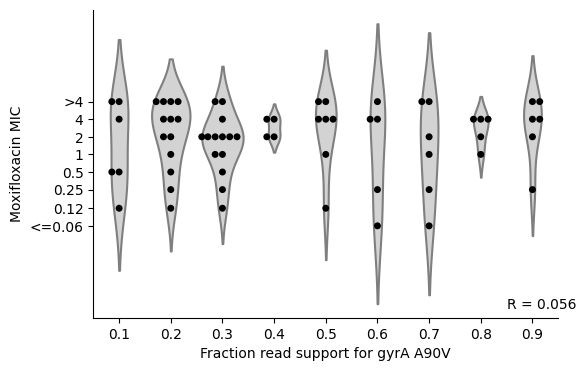

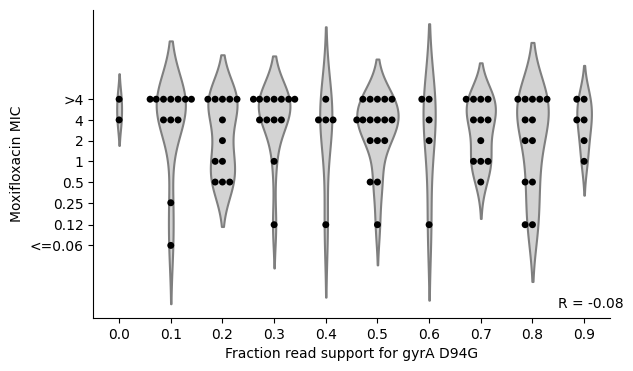

In [733]:
frs_boxplot('gyrAA90V', 'LEV')
frs_boxplot('gyrAD94G', 'LEV')
frs_boxplot('gyrAA90V', 'MXF')
frs_boxplot('gyrAD94G', 'MXF')

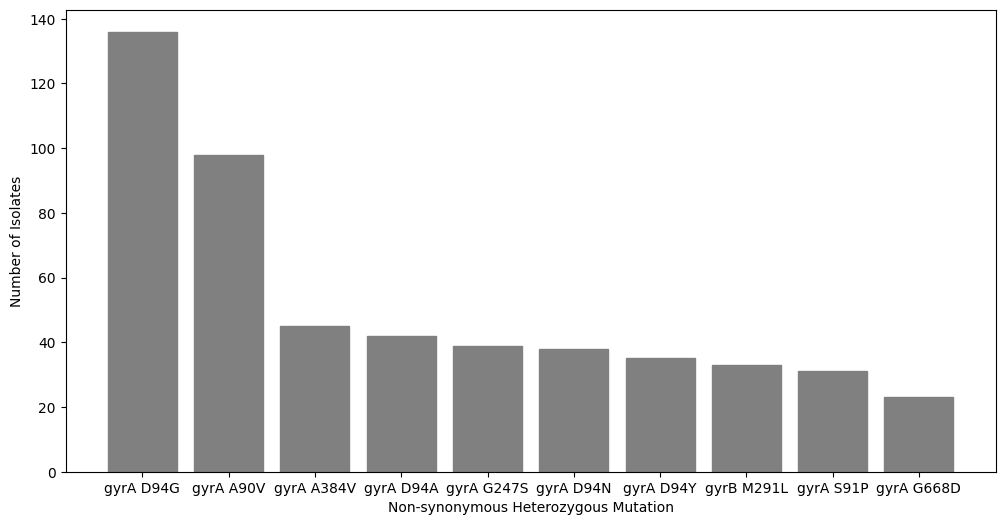

In [649]:
#most common heterozygous mutations
from collections import Counter
hets_list=final_hets_df.HET_MUTATION.to_list()
cleaned_hets = [x for x in hets_list if str(x) != 'nan']
cleaned_hets = [x for x in cleaned_hets if x[4] != x[-1]]
c=Counter(cleaned_hets)
c=dict(sorted(c.items(), reverse=True, key=lambda item: item[1]))
c10 = dict(list(c.items())[0: 10])
plt.figure(figsize=(12,6))
plt.bar(c10.keys(), c10.values(), color='gray',edgecolor='gray')
plt.ylabel('Number of Isolates')
plt.xlabel('Non-synonymous Heterozygous Mutation')
plt.show()

In [650]:
c

{'gyrA D94G': 136,
 'gyrA A90V': 98,
 'gyrA A384V': 45,
 'gyrA D94A': 42,
 'gyrA G247S': 39,
 'gyrA D94N': 38,
 'gyrA D94Y': 35,
 'gyrB M291L': 33,
 'gyrA S91P': 31,
 'gyrA G668D': 23,
 'gyrA D94H': 22,
 'gyrA S95T': 20,
 'gyrB E501Q': 18,
 'gyrA A827V': 14,
 'gyrA L12F': 14,
 'gyrA L197L': 13,
 'gyrA A833T': 12,
 'gyrB D461N': 9,
 'gyrB A295S': 9,
 'gyrB N499D': 8,
 'gyrB V301L': 7,
 'gyrB P94S': 7,
 'gyrB S661C': 7,
 'gyrA A288D': 7,
 'gyrB N499H': 6,
 'gyrA S95G': 6,
 'gyrB M291T': 6,
 'gyrB P94L': 5,
 'gyrB M291I': 5,
 'gyrA D89N': 5,
 'gyrB S661R': 5,
 'gyrB I271V': 5,
 'gyrB S661I': 4,
 'gyrB S447S': 4,
 'gyrA G694G': 4,
 'gyrA P123P': 3,
 'gyrB D461H': 3,
 'gyrB A130S': 3,
 'gyrA G88A': 3,
 'gyrA Q613E': 3,
 'gyrB T500T': 3,
 'gyrA A74S': 3,
 'gyrA Y582Y': 3,
 'gyrA V674V': 3,
 'gyrA G47G': 3,
 'gyrA L465L': 3,
 'gyrB D449H': 2,
 'gyrB R451S': 2,
 'gyrB G464C': 2,
 'gyrB I556V': 2,
 'gyrB A355T': 2,
 'gyrB V328L': 2,
 'gyrA D111D': 2,
 'gyrB A398S': 2,
 'gyrB A504S': 2,
 'gyrB G

In [651]:
catalogue_mutations=pd.read_csv('catalogue_mutations.csv')
test_mutations=pd.read_csv('assay_mutations_list.csv')

In [652]:
genomes = pd.read_pickle("../cryptic_data_analysis/data_tables/cryptic-analysis-group/GENOMES.pkl.gz")
genomes.reset_index(level=0, inplace=True)
genomes=genomes.loc[genomes['BELONGS_GPI']==True]
phenotypes = pd.read_pickle("../cryptic_data_analysis/data_tables/cryptic-analysis-group/UKMYC_PHENOTYPES.pkl.gz")
phenotypes.reset_index(level=1, inplace=True)
phenotypes.reset_index(level=0, inplace=True)
phenotypes=phenotypes.loc[phenotypes['BELONGS_GPI']==True]
fq_phenotypes=phenotypes.loc[phenotypes.DRUG.isin(['LEV','MXF'])]
variants=pd.read_csv("hacky-gyrAB-hets/VARIANTS-gyr.csv.gz")
gyrase_mutations=pd.read_pickle("../cryptic_data_analysis/data_tables/cryptic-analysis-group/MUTATIONS_GPI.pkl.gz")
gyrase_mutations.reset_index(inplace=True)
gyrase_mutations=gyrase_mutations.loc[gyrase_mutations.GENE.isin(['gyrA','gyrB'])]

KeyboardInterrupt: 

In [ ]:
samples = pd.read_pickle("../cryptic_data_analysis/data_tables/cryptic-analysis-group/SAMPLES.pkl.gz")
samples.reset_index(level=2, inplace=True)
samples.reset_index(level=1, inplace=True)
samples.reset_index(level=0, inplace=True)

In [69]:
pm=pd.merge(fq_phenotypes, gyrase_mutations, how='left', on='UNIQUEID')

In [52]:
pm.loc[(pm.DRUG=='MXF')&(pm.BINARY_PHENOTYPE=='R')&(pm.MUTATION.isin(catalogue_mutations.Mutation.to_list()))].UNIQUEID.nunique()

NameError: name 'catalogue_mutations' is not defined

In [ ]:
pm.loc[(pm.DRUG=='MXF')&(pm.BINARY_PHENOTYPE=='R')&(pm.MUTATION.isin(test_mutations.Mutation.to_list()))].UNIQUEID.nunique()

In [ ]:
pm.loc[(pm.DRUG=='MXF')&(pm.BINARY_PHENOTYPE=='R')].UNIQUEID.nunique()

In [70]:
pm["geneXmutation"] = pm["GENE"].astype(str) + pm["MUTATION"].astype(str)
pm["geneXposition"] = pm["GENE"].astype(str) + pm["POSITION"].astype(str)

In [ ]:
catalogue_mutations["geneXmutation"] = catalogue_mutations["Gene"].astype(str) + catalogue_mutations["Mutation"].astype(str)
catalogue_mutations["geneXposition"] = catalogue_mutations["Gene"].astype(str) + catalogue_mutations["Region"].astype(str)

In [ ]:
test_mutations["geneXmutation"] = test_mutations["Gene"].astype(str) + test_mutations["Mutation"].astype(str)
test_mutations["geneXposition"] = test_mutations["Gene"].astype(str) + test_mutations["Region"].astype(str)

In [71]:
pmh=pd.merge(pm, mutations_het[['UNIQUEID','HET_1','HET_2','HET_3','HET_4']], how='left',on='UNIQUEID')

In [72]:
pmh=pd.merge(pmh, genomes[['UNIQUEID','LINEAGE_NAME','SITEID','SUBJID','LABID']], how='left', on='UNIQUEID')

In [73]:
pmh=pd.merge(pmh, samples, how='left', on=['SITEID','SUBJID','LABID'])

In [ ]:
pmg=pd.merge(pm, genomes, how='left', on=['UNIQUEID'])

In [ ]:
pmgs=pd.merge(pmg, samples, how='left', on=['SITEID','SUBJID','LABID'])

In [189]:
#mdr_phenotypes=phenotypes.loc[(phenotypes['DRUG']=='RIF')&(phenotypes['BINARY_PHENOTYPE']=='R')].UNIQUEID.unique()
rif_r_phenotypes=phenotypes.loc[(phenotypes['DRUG']=='RIF')&(phenotypes['BINARY_PHENOTYPE']=='R')]
inh_r_phenotypes=phenotypes.loc[(phenotypes['DRUG']=='INH')&(phenotypes['BINARY_PHENOTYPE']=='R')]
mdr_phenotypes=pd.merge(rif_r_phenotypes, inh_r_phenotypes, how='inner', on='UNIQUEID').UNIQUEID.unique()
print(len(mdr_phenotypes))

4087


In [184]:
for i in pmgs.COUNTRY_WHERE_SAMPLE_TAKEN.unique():
    print(i, 
          pmgs.loc[(pmgs.DRUG=='MXF')&(pmgs.BINARY_PHENOTYPE=='R')&(pmgs.COUNTRY_WHERE_SAMPLE_TAKEN==i) &(pmgs.UNIQUEID.isin(mdr_phenotypes))].UNIQUEID.nunique(),
          pmgs.loc[(pmgs.DRUG=='MXF')&(pmgs.BINARY_PHENOTYPE=='S')&(pmgs.COUNTRY_WHERE_SAMPLE_TAKEN==i) &(pmgs.UNIQUEID.isin(mdr_phenotypes))].UNIQUEID.nunique())

nan 0 0
PAK 105 281
IND 462 305
TJK 2 8
ITA 50 169
ZAF 259 387
CHN 103 172
PER 119 726
VNM 7 107
DEU 15 70
NPL 107 35
BRA 13 69
BFA 0 0
TKM 14 54
SWE 0 0
NGA 0 11
DZA 0 2
UKR 6 9
KGZ 5 9
ALB 0 0
TUN 0 0
JPN 0 1


In [185]:
for i in pmgs.COUNTRY_WHERE_SAMPLE_TAKEN.unique():
    print(i, 
          pmgs.loc[(pmgs.DRUG=='LEV')&(pmgs.BINARY_PHENOTYPE=='R')&(pmgs.COUNTRY_WHERE_SAMPLE_TAKEN==i) &(pmgs.UNIQUEID.isin(mdr_phenotypes))].UNIQUEID.nunique(),
          pmgs.loc[(pmgs.DRUG=='LEV')&(pmgs.BINARY_PHENOTYPE=='S')&(pmgs.COUNTRY_WHERE_SAMPLE_TAKEN==i) &(pmgs.UNIQUEID.isin(mdr_phenotypes))].UNIQUEID.nunique())

nan 0 0
PAK 188 199
IND 521 248
TJK 3 7
ITA 63 156
ZAF 276 363
CHN 120 154
PER 139 707
VNM 11 103
DEU 24 62
NPL 132 10
BRA 15 68
BFA 0 0
TKM 20 48
SWE 0 0
NGA 0 11
DZA 1 1
UKR 6 9
KGZ 9 5
ALB 0 0
TUN 0 0
JPN 0 1


In [186]:
for i in pmgs.BINARY_PHENOTYPE.unique():
    print(i, 
          pmgs.loc[(pmgs.DRUG=='MXF')&(pmgs.BINARY_PHENOTYPE==i)&(pmgs.UNIQUEID.isin(mdr_phenotypes))].UNIQUEID.nunique(),
          pmgs.loc[(pmgs.DRUG=='MXF')&(pmgs.BINARY_PHENOTYPE==i)&(-pmgs.UNIQUEID.isin(mdr_phenotypes))].UNIQUEID.nunique())

S 3068 7402
R 1585 139
nan 0 0


In [187]:
for i in pmgs.BINARY_PHENOTYPE.unique():
    print(i, 
          pmgs.loc[(pmgs.DRUG=='LEV')&(pmgs.BINARY_PHENOTYPE==i)&(pmgs.UNIQUEID.isin(mdr_phenotypes))].UNIQUEID.nunique(),
          pmgs.loc[(pmgs.DRUG=='LEV')&(pmgs.BINARY_PHENOTYPE==i)&(-pmgs.UNIQUEID.isin(mdr_phenotypes))].UNIQUEID.nunique())

S 2725 7292
R 1925 221
nan 0 0


In [238]:
def mutations_list_performance(drug_code, test_name, mut_or_region):
    

    t_data = test_mutations.loc[(test_mutations.Test==test_name)&(test_mutations.Drug==drug_code)]
    
    r_data=pmh.loc[(pmh.DRUG==drug_code)&(pmh.BINARY_PHENOTYPE=='R')]
    s_data=pmh.loc[(pmh.DRUG==drug_code)&(pmh.BINARY_PHENOTYPE=='S')]
    r_samples=r_data.UNIQUEID.nunique()
    s_samples=s_data.UNIQUEID.nunique()
    
    r_mutation_df=pd.DataFrame()
    s_mutation_df=pd.DataFrame()
    r_mutation_df = r_mutation_df.append(r_data.loc[((r_data.geneXmutation.notna())&(r_data.geneXmutation.isin(t_data['geneXmutation'].to_list())))|
                                                   ((r_data.HET_1.isin(t_data['geneXmutation'].to_list()))|
                                                     (r_data.HET_2.isin(t_data['geneXmutation'].to_list()))|
                                                     (r_data.HET_3.isin(t_data['geneXmutation'].to_list()))|
                                                     (r_data.HET_4.isin(t_data['geneXmutation'].to_list())))])
    s_mutation_df = s_mutation_df.append(s_data.loc[((s_data.geneXmutation.notna())&(s_data.geneXmutation.isin(t_data['geneXmutation'].to_list())))|
                                                   ((s_data.HET_1.isin(t_data['geneXmutation'].to_list()))|
                                                     (s_data.HET_2.isin(t_data['geneXmutation'].to_list()))|
                                                     (s_data.HET_3.isin(t_data['geneXmutation'].to_list()))|
                                                     (s_data.HET_4.isin(t_data['geneXmutation'].to_list())))])

    if mut_or_region=='region':
        s_mutation_df = s_mutation_df.append(s_data.loc[((s_data.geneXposition.notna())&(s_data.geneXposition.isin(t_data['geneXposition'].to_list())))
                                                        &(s_data.IS_HET==False)
                                                        &(s_data.IS_FILTER_PASS==True)
                                                        &(s_data.IS_NULL==False)
                                                        &(-s_data.MUTATION.isin(t_data['Susceptible'].dropna().to_list()))])
        r_mutation_df = r_mutation_df.append(r_data.loc[((r_data.geneXposition.notna())&(r_data.geneXposition.isin(t_data['geneXposition'].to_list())))
                                                        &(r_data.IS_HET==False)
                                                        &(r_data.IS_FILTER_PASS==True)
                                                        &(r_data.IS_NULL==False)
                                                        &(-r_data.MUTATION.isin(t_data['Susceptible'].dropna().to_list()))])            
#    if len(t_data.Susceptible.dropna().unique())>=1:
 #       r_mutation_df=r_mutation_df.loc[]
    r_mutations= r_mutation_df.UNIQUEID.nunique()    
    s_mutations= s_mutation_df.UNIQUEID.nunique()
    sens=r_mutations/r_data.UNIQUEID.nunique()
    spec=(s_data.UNIQUEID.nunique()-s_mutations)/s_data.UNIQUEID.nunique()
    prev=r_samples/(r_samples+s_samples)
    ppv_data=sens*prev/(sens*prev+(1-spec)*(1-prev))
    npv_data=spec*(1-prev)/((1-sens)*prev+spec*(1-prev))
    prev_1=0.01
    ppv_data_1=sens*prev_1/(sens*prev_1+(1-spec)*(1-prev))
    npv_data_1=spec*(1-prev_1)/((1-sens)*prev_1+spec*(1-prev_1))
    prev_30=0.3
    ppv_data_30=sens*prev_30/(sens*prev_30+(1-spec)*(1-prev))
    npv_data_30=spec*(1-prev_30)/((1-sens)*prev_30+spec*(1-prev_30))
    prev_40=0.4
    ppv_data_40=sens*prev_40/(sens*prev_40+(1-spec)*(1-prev))
    npv_data_40=spec*(1-prev_40)/((1-sens)*prev_40+spec*(1-prev_40))
    df = pd.DataFrame([{'Drug':drug_code,'Name':test_name, 
                       'No_R':r_samples, 'No_S':s_samples,
                       'R_mut':r_mutations,'S_mut':s_mutations,
                       'Sensitivity':sens, 'Specificity':spec, 'Mut_or_Reg':mut_or_region,
                       'PPV_'+str(prev):ppv_data, 'PPV_1%':ppv_data_1, 'PPV_30%':ppv_data_30, 'PPV_40%':ppv_data_40,
                       'NPV':npv_data, 'NPV_1%':npv_data_1, 'NPV_30%':npv_data_30, 'NPV_40%':npv_data_40}])
    return df

In [191]:
def mutations_cat_performance(drug_code, catalogue_name):
    r_data=pmh.loc[(pmh.DRUG==drug_code)&(pmh.BINARY_PHENOTYPE=='R')]
    r_samples=r_data.UNIQUEID.nunique()
    print(r_samples)
    s_data=pmh.loc[(pmh.DRUG==drug_code)&(pmh.BINARY_PHENOTYPE=='S')]
    s_samples=s_data.UNIQUEID.nunique()
    print(s_samples)
    cat_df=catalogue_mutations.loc[catalogue_mutations.Catalogue==catalogue_name]
    r_mutations = r_data.loc[(r_data.geneXmutation.isin(cat_df.geneXmutation.to_list()))|
                             (r_data.HET_1.isin(cat_df.geneXmutation.to_list()))|
                             (r_data.HET_2.isin(cat_df.geneXmutation.to_list()))|
                             (r_data.HET_3.isin(cat_df.geneXmutation.to_list()))|
                             (r_data.HET_4.isin(cat_df.geneXmutation.to_list()))].UNIQUEID.nunique()
    s_mutations = s_data.loc[(s_data.geneXmutation.isin(cat_df.geneXmutation.to_list()))|
                             (s_data.HET_1.isin(cat_df.geneXmutation.to_list()))|
                             (s_data.HET_2.isin(cat_df.geneXmutation.to_list()))|
                             (s_data.HET_3.isin(cat_df.geneXmutation.to_list()))|
                             (s_data.HET_4.isin(cat_df.geneXmutation.to_list()))].UNIQUEID.nunique()
    sens=r_mutations/r_data.UNIQUEID.nunique()
    spec=(s_data.UNIQUEID.nunique()-s_mutations)/s_data.UNIQUEID.nunique()
    prev=r_samples/(r_samples+s_samples)
    ppv_data=sens*prev/(sens*prev+(1-spec)*(1-prev))
    npv_data=spec*(1-prev)/((1-sens)*prev+spec*(1-prev))
    prev_1=0.01
    ppv_data_1=sens*prev_1/(sens*prev_1+(1-spec)*(1-prev))
    npv_data_1=spec*(1-prev_1)/((1-sens)*prev_1+spec*(1-prev_1))
    prev_30=0.3
    ppv_data_30=sens*prev_30/(sens*prev_30+(1-spec)*(1-prev))
    npv_data_30=spec*(1-prev_30)/((1-sens)*prev_30+spec*(1-prev_30))
    prev_40=0.4
    ppv_data_40=sens*prev_40/(sens*prev_40+(1-spec)*(1-prev))
    npv_data_40=spec*(1-prev_40)/((1-sens)*prev_40+spec*(1-prev_40))
    df = pd.DataFrame([{'Drug':drug_code,'Name':catalogue_name, 
                       'No_R':r_samples, 'No_S':s_samples,
                       'R_mut':r_mutations,'S_mut':s_mutations,
                       'Sensitivity':sens, 'Specificity':spec, 'Mut_or_Reg':'cat',
                       'PPV_'+str(prev):ppv_data, 'PPV_1%':ppv_data_1, 'PPV_30%':ppv_data_30, 'PPV_40%':ppv_data_40,
                       'NPV':npv_data, 'NPV_1%':npv_data_1, 'NPV_30%':npv_data_30, 'NPV_40%':npv_data_40}])
    return df

In [478]:
def no_het_cat_performance(drug_code, catalogue_name):
    r_data=pmh.loc[(pmh.DRUG==drug_code)&(pmh.BINARY_PHENOTYPE=='R')]
    r_samples=r_data.UNIQUEID.nunique()
    print(r_samples)
    s_data=pmh.loc[(pmh.DRUG==drug_code)&(pmh.BINARY_PHENOTYPE=='S')]
    s_samples=s_data.UNIQUEID.nunique()
    print(s_samples)
    cat_df=catalogue_mutations.loc[catalogue_mutations.Catalogue==catalogue_name]
    r_mutations = r_data.loc[(r_data.geneXmutation.isin(cat_df.geneXmutation.to_list()))].UNIQUEID.nunique()
    s_mutations = s_data.loc[(s_data.geneXmutation.isin(cat_df.geneXmutation.to_list()))].UNIQUEID.nunique()
    sens=r_mutations/r_data.UNIQUEID.nunique()
    spec=(s_data.UNIQUEID.nunique()-s_mutations)/s_data.UNIQUEID.nunique()
    prev=r_samples/(r_samples+s_samples)
    ppv_data=sens*prev/(sens*prev+(1-spec)*(1-prev))
    npv_data=spec*(1-prev)/((1-sens)*prev+spec*(1-prev))
    prev_1=0.01
    ppv_data_1=sens*prev_1/(sens*prev_1+(1-spec)*(1-prev))
    npv_data_1=spec*(1-prev_1)/((1-sens)*prev_1+spec*(1-prev_1))
    prev_30=0.3
    ppv_data_30=sens*prev_30/(sens*prev_30+(1-spec)*(1-prev))
    npv_data_30=spec*(1-prev_30)/((1-sens)*prev_30+spec*(1-prev_30))
    prev_40=0.4
    ppv_data_40=sens*prev_40/(sens*prev_40+(1-spec)*(1-prev))
    npv_data_40=spec*(1-prev_40)/((1-sens)*prev_40+spec*(1-prev_40))
    df = pd.DataFrame([{'Drug':drug_code,'Name':catalogue_name, 
                       'No_R':r_samples, 'No_S':s_samples,
                       'R_mut':r_mutations,'S_mut':s_mutations,
                       'Sensitivity':sens, 'Specificity':spec, 'Mut_or_Reg':'cat_no_het',
                       'PPV_'+str(prev):ppv_data, 'PPV_1%':ppv_data_1, 'PPV_30%':ppv_data_30, 'PPV_40%':ppv_data_40,
                       'NPV':npv_data, 'NPV_1%':npv_data_1, 'NPV_30%':npv_data_30, 'NPV_40%':npv_data_40}])
    return df

In [198]:
def cat_false_negs(drug_code, catalogue_name):
    r_data=pmh.loc[(pmh.DRUG==drug_code)&(pmh.BINARY_PHENOTYPE=='R')]
    r_samples=r_data.UNIQUEID.nunique()
    cat_df=catalogue_mutations.loc[catalogue_mutations.Catalogue==catalogue_name]
    r_mutations = r_data.loc[(r_data.geneXmutation.isin(cat_df.geneXmutation.to_list()))|
                             (r_data.HET_1.isin(cat_df.geneXmutation.to_list()))|
                             (r_data.HET_2.isin(cat_df.geneXmutation.to_list()))|
                             (r_data.HET_3.isin(cat_df.geneXmutation.to_list()))|
                             (r_data.HET_4.isin(cat_df.geneXmutation.to_list()))].UNIQUEID.unique()
    tps=r_data.loc[r_data.UNIQUEID.isin(r_mutations)].index
    fn_df=r_data.drop(tps)
    
    return fn_df

In [623]:
def cat_false_pos(drug_code, catalogue_name):
    s_data=pm.loc[(pm.DRUG==drug_code)&(pm.BINARY_PHENOTYPE=='S')]
    s_samples=s_data.UNIQUEID.nunique()
    cat_df=catalogue_mutations.loc[catalogue_mutations.Catalogue==catalogue_name]
    fp_df = s_data.loc[s_data.geneXmutation.isin(cat_df.geneXmutation.to_list())]

    
    return fp_df

In [624]:
who_fp_df=cat_false_pos('MXF', 'WHO 2021')

In [625]:
who_fp_df.UNIQUEID.nunique()

548

In [626]:
who_fp_df.loc[(-who_fp_df.geneXmutation.isin(lin_list))&(who_fp_df.IS_FILTER_PASS==True)
              &(who_fp_df.IS_SYNONYMOUS==False) & (who_fp_df.IS_NULL==False)].geneXmutation.value_counts()

gyrAA90V     218
gyrAD94G     157
gyrAD94A      60
gyrAS91P      35
gyrAD94N      27
gyrBD461N     14
gyrAD94Y      12
gyrAD94H      10
gyrAG88A       7
gyrBE501D      6
gyrBA504V      5
gyrAG88C       3
gyrBN499D      2
gyrBE501V      1
Name: geneXmutation, dtype: int64

In [629]:
who_fp_df_g=pd.merge(who_fp_df, genomes, how='left', on=['UNIQUEID'])
for i in ['Lineage 1', 'Lineage 2','Lineage 3','Lineage 4' ]:
    print(who_fp_df_g.loc[who_fp_df_g.LINEAGE_NAME==i].UNIQUEID.nunique(),
          pmg.loc[(pmg.BINARY_PHENOTYPE=='S')&(pmg.LINEAGE_NAME==i)].UNIQUEID.nunique(),
          who_fp_df_g.loc[who_fp_df_g.LINEAGE_NAME==i].UNIQUEID.nunique()/
         pmg.loc[(pmg.BINARY_PHENOTYPE=='S')&(pmg.LINEAGE_NAME==i)].UNIQUEID.nunique())
#stat significantly more FPs for L3 than L2 and mroe for L2 than L4

9 649 0.01386748844375963
301 3297 0.09129511677282377
120 934 0.1284796573875803
117 5668 0.020642201834862386


In [199]:
who_fn_df=cat_false_negs('MXF', 'WHO 2021')

In [275]:
who_fn_df_lev=cat_false_negs('LEV', 'WHO 2021')

In [200]:
who_fn_df.UNIQUEID.nunique()

119

In [201]:
who_fn_df.geneXmutation.value_counts()

gyrAE21Q     133
gyrAG668D    124
gyrAS95T     117
gyrAD89N      13
gyrBM291I     12
            ... 
gyrBG470C      1
gyrAR68R       1
gyrAD89X       1
gyrAV97X       1
gyrAL105R      1
Name: geneXmutation, Length: 70, dtype: int64

In [1194]:
who_fn_df.loc[who_fn_df.geneXmutation=='gyrAA90X']

,UNIQUEID,DRUG,PLATEDESIGN,BELONGS_GPI,SITEID_x,DILUTION,PHENOTYPE_QUALITY,READINGDAY,PRIMARY_DILUTION,PRIMARY_METHOD,...,IS_FILTER_PASS,ELEMENT_TYPE,MUTATION_TYPE,INDEL_LENGTH,INDEL_1,INDEL_2,SITEID_y,NUMBER_NUCLEOTIDE_CHANGES,geneXmutation,geneXposition
20927,site.05.subj.LR-2032.lab.FN-00407-15.iso.1,MXF,UKMYC6,True,05,6.0,LOW,14,6.0,VZ,...,True,GENE,AAM,NaN,,,05,3.0,gyrAA90X,gyrA90.0


In [551]:
het_list=['gyrAG88O','gyrAD94O','gyrAA90O','gyrAS91O','gyrBE501O', 'gyrBA504O', 'gyrBN499O']

In [206]:
lin_list=['gyrAS95T','gyrAG668D','gyrAE21Q','gyrAG247S', 
          'gyrAA384V','gyrBM291I', 'gyrAT80A', 'gyrBA403S', 'gyrAL712V']

In [202]:
who_fn_df_g=pd.merge(who_fn_df, genomes, how='left', on=['UNIQUEID'])
for i in ['Lineage 1', 'Lineage 2','Lineage 3','Lineage 4' ]:
    print(who_fn_df_g.loc[who_fn_df_g.LINEAGE_NAME==i].UNIQUEID.nunique(),
          pmg.loc[(pmg.BINARY_PHENOTYPE=='R')&(pmg.LINEAGE_NAME==i)].UNIQUEID.nunique(),
          who_fn_df_g.loc[who_fn_df_g.LINEAGE_NAME==i].UNIQUEID.nunique()/
         pmg.loc[(pmg.BINARY_PHENOTYPE=='R')&(pmg.LINEAGE_NAME==i)].UNIQUEID.nunique())
    
#statistically significant difference between L2 and L4   

12 62 0.1935483870967742
47 1236 0.03802588996763754
15 263 0.057034220532319393
45 629 0.07154213036565978


In [278]:
fn_muts_df=who_fn_df.loc[(-who_fn_df.geneXmutation.isin(lin_list))
                         &(who_fn_df.IS_FILTER_PASS==True)
                         &(who_fn_df.IS_SYNONYMOUS==False) 
                         &(who_fn_df.IS_NULL==False)].geneXmutation.value_counts().sort_values(ascending=False).to_frame()
fn_muts_df.reset_index(level=0, inplace=True)
fn_muts_df=fn_muts_df.rename(columns={'index': 'geneXmutation', 'geneXmutation':'count'})
fn_muts_df

,geneXmutation,count
0,gyrAD89N,13
1,gyrAc-34t,3
2,gyrBT500N,3
3,gyrAA288D,2
4,gyrAS95A,2
5,gyrBP94L,2
6,gyrBR446C,2
7,gyrAA463S,2
8,gyrBA504T,2
9,gyrBS447F,2


In [279]:
fn_muts_df_lev=who_fn_df_lev.loc[(-who_fn_df_lev.geneXmutation.isin(lin_list))
                         &(who_fn_df_lev.IS_FILTER_PASS==True)
                         &(who_fn_df_lev.IS_SYNONYMOUS==False) 
                         &(who_fn_df_lev.IS_NULL==False)].geneXmutation.value_counts().sort_values(ascending=False).to_frame()
fn_muts_df_lev.reset_index(level=0, inplace=True)
fn_muts_df_lev=fn_muts_df_lev.rename(columns={'index': 'geneXmutation', 'geneXmutation':'count'})
fn_muts_df_lev

,geneXmutation,count
0,gyrAc-34t,10
1,gyrAD89N,8
2,gyrAA463S,4
3,gyrBP94L,3
4,gyrBS447F,3
5,gyrAR252L,3
6,gyrBR446C,3
7,gyrAQ613E,3
8,gyrBR446H,2
9,gyrBA504T,2


<AxesSubplot:>

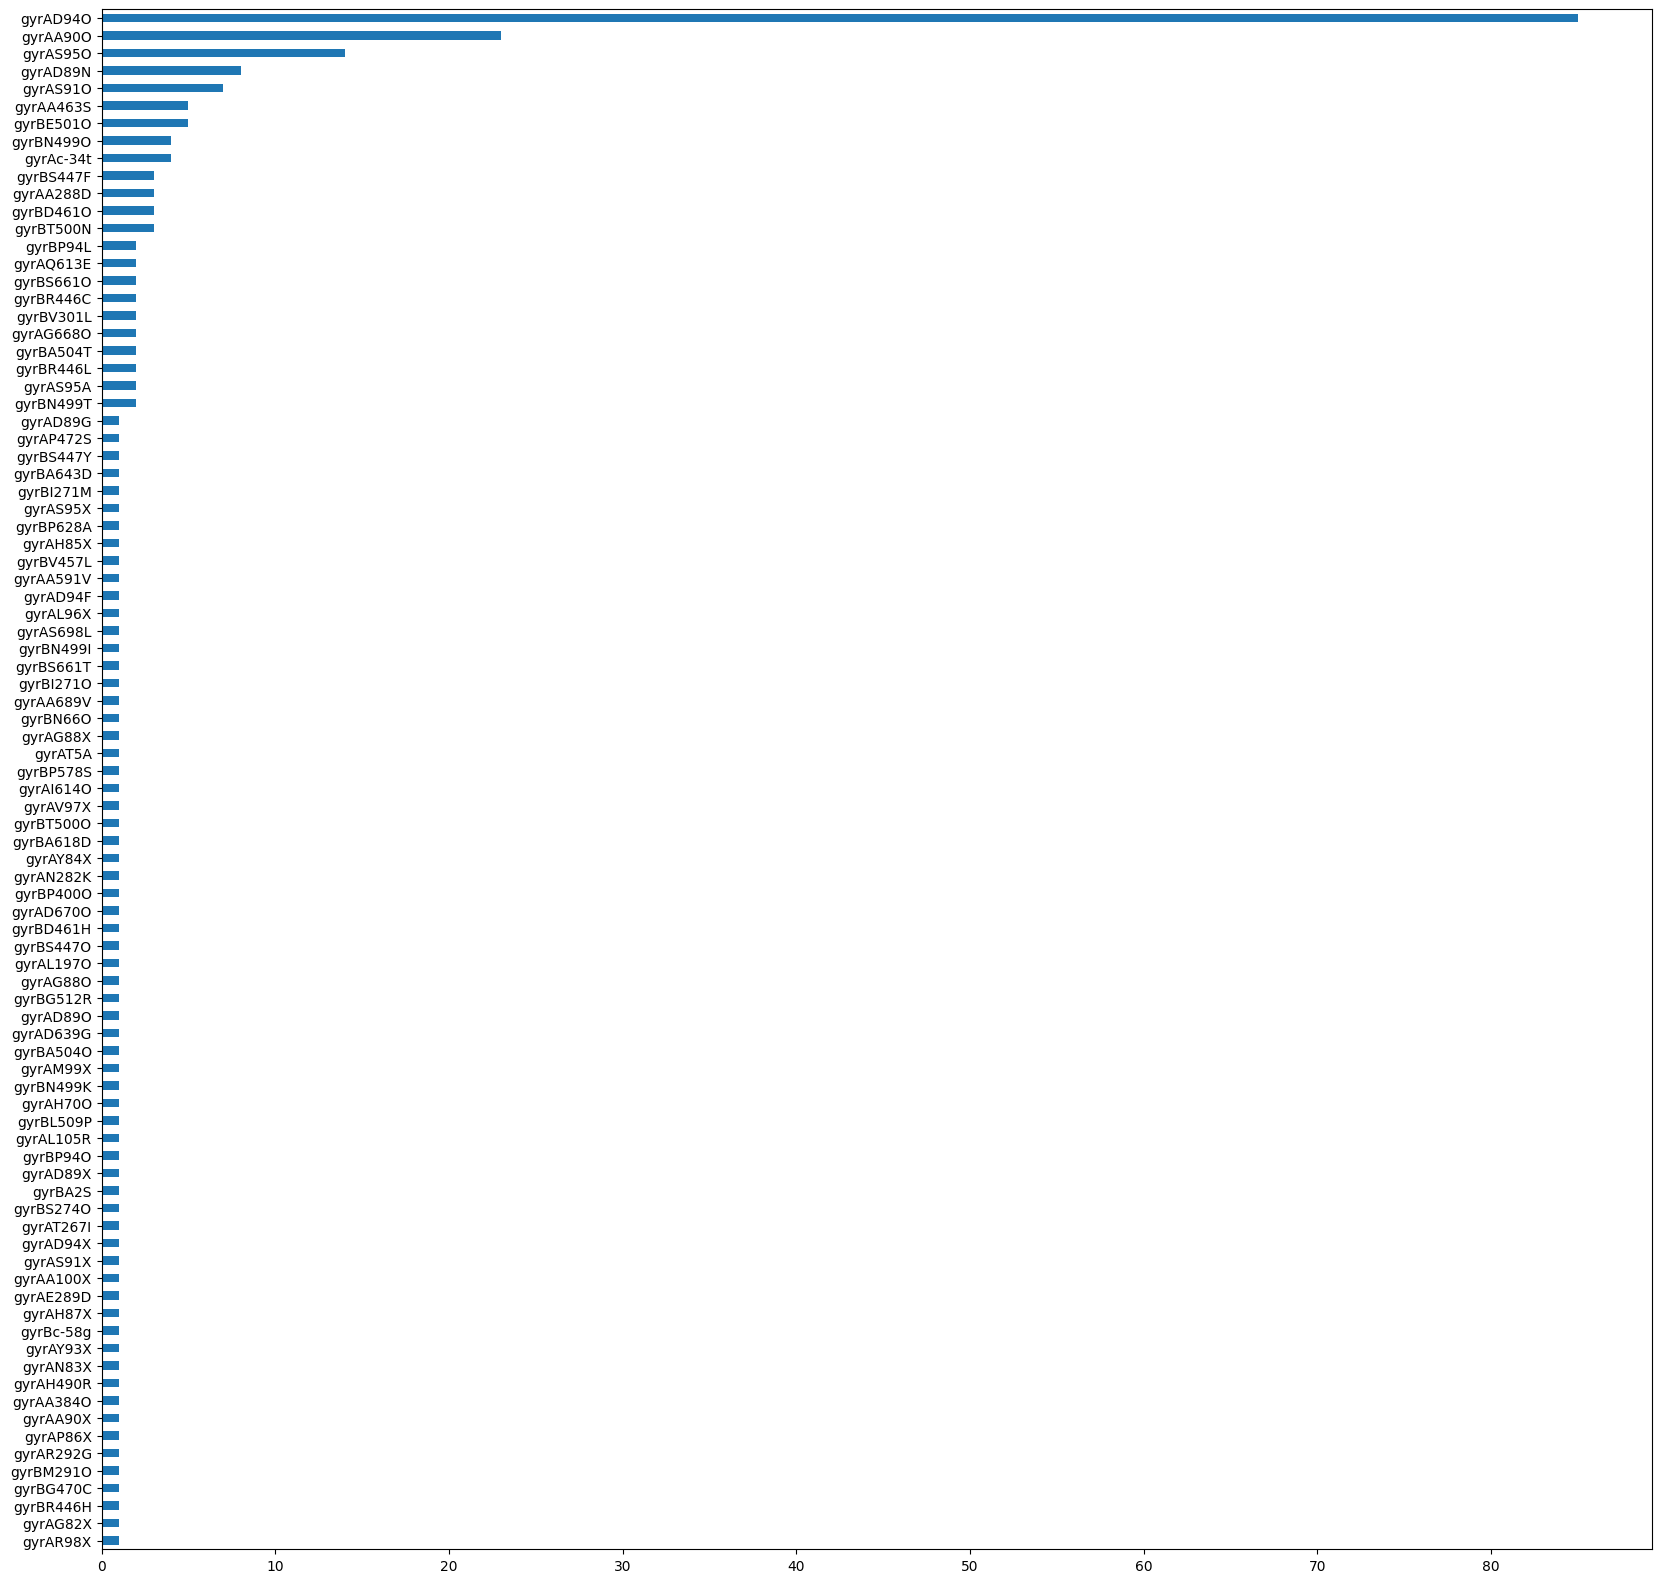

In [1200]:
who_fn_df.loc[(-who_fn_df.geneXmutation.isin(lin_list))
              &(who_fn_df.IS_SYNONYMOUS==False) ].geneXmutation.value_counts().sort_values().plot(kind = 'barh', figsize=(20,20))



In [605]:
who_fn_df.loc[who_fn_df.geneXmutation.isin(het_list)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 1898 to 92999
Data columns (total 45 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   UNIQUEID                              130 non-null    object  
 1   DRUG                                  130 non-null    category
 2   PLATEDESIGN                           130 non-null    category
 3   BELONGS_GPI                           130 non-null    bool    
 4   SITEID_x                              130 non-null    category
 5   DILUTION                              130 non-null    float64 
 6   PHENOTYPE_QUALITY                     130 non-null    category
 7   READINGDAY                            130 non-null    category
 8   PRIMARY_DILUTION                      130 non-null    float64 
 9   PRIMARY_METHOD                        130 non-null    category
 10  AMYGDA_DILUTION                       117 non-null    float64 
 11  B

In [606]:
who_fn_df_g.loc[who_fn_df_g.geneXmutation.isin(het_list)].LINEAGE_NAME.value_counts()

Lineage 2    68
Lineage 4    49
Lineage 3    10
Lineage 1     3
              0
Lineage 5     0
Lineage 6     0
Name: LINEAGE_NAME, dtype: int64

In [574]:
who_fn_df.loc[who_fn_df.geneXmutation=='gyrAA90X']

,UNIQUEID,DRUG,PLATEDESIGN,BELONGS_GPI,SITEID_x,DILUTION,PHENOTYPE_QUALITY,READINGDAY,PRIMARY_DILUTION,PRIMARY_METHOD,...,IS_FILTER_PASS,ELEMENT_TYPE,MUTATION_TYPE,INDEL_LENGTH,INDEL_1,INDEL_2,SITEID_y,NUMBER_NUCLEOTIDE_CHANGES,geneXmutation,geneXposition
20927,site.05.subj.LR-2032.lab.FN-00407-15.iso.1,MXF,UKMYC6,True,05,6.0,LOW,14,6.0,VZ,...,True,GENE,AAM,NaN,,,05,3.0,gyrAA90X,gyrA90.0


In [553]:
who_fn_df.loc[who_fn_df.geneXmutation.isin(het_list)].UNIQUEID.nunique()

124

In [192]:
results_df = pd.DataFrame()
for i in pm.DRUG.unique():
    for j in catalogue_mutations.Catalogue.unique():
        results_df=results_df.append(mutations_cat_performance(i,j))

1724
10470
1724
10470
2146
10017
2146
10017


In [193]:
results_df

,Drug,Name,No_R,No_S,R_mut,S_mut,Sensitivity,Specificity,Mut_or_Reg,PPV_0.14138100705264883,PPV_1%,PPV_30%,PPV_40%,NPV,NPV_1%,NPV_30%,NPV_40%,PPV_0.17643673435829976
0,MXF,WHO 2021,1724,10470,1605,634,0.930974,0.939446,cat,0.716838,0.151866,0.843057,0.877486,0.988046,0.999258,0.969472,0.953304,NaN
0,MXF,Miotto 2017,1724,10470,1583,609,0.918213,0.941834,cat,0.722172,0.155301,0.846523,0.880299,0.985903,0.999124,0.964119,0.945276,NaN
0,LEV,WHO 2021,2146,10017,1926,320,0.897484,0.968054,cat,NaN,0.254359,0.910983,0.931718,0.977816,0.998931,0.956585,0.934056,0.857524
0,LEV,Miotto 2017,2146,10017,1895,304,0.883038,0.969652,cat,NaN,0.261067,0.913786,0.933915,0.974809,0.998783,0.950846,0.925570,0.861755


In [473]:
results_df = pd.DataFrame()
for i in pm.DRUG.unique():
    for j in catalogue_mutations.Catalogue.unique():
        results_df=results_df.append(mutations_cat_performance(i,j))
        
region_test_data=test_mutations.loc[test_mutations.Region.notna()]
mutation_test_data=test_mutations.loc[test_mutations.Mutation.notna()]
for i in mutation_test_data.Drug.unique():
    for j in mutation_test_data.loc[mutation_test_data.Drug==i].Test.unique():
        results_df=results_df.append(mutations_list_performance(i, j, 'mut'))

for i in region_test_data.Drug.unique():
    for j in region_test_data.loc[region_test_data.Drug==i].Test.unique():
        results_df=results_df.append(mutations_list_performance(i, j, 'region'))
results_df.reset_index(drop=True, inplace=True) 

1724
10470
1724
10470
2146
10017
2146
10017


In [474]:
results_df

,Drug,Name,No_R,No_S,R_mut,S_mut,Sensitivity,Specificity,Mut_or_Reg,PPV_0.14138100705264883,PPV_1%,PPV_30%,PPV_40%,NPV,NPV_1%,NPV_30%,NPV_40%,PPV_0.17643673435829976
0,MXF,WHO 2021,1724,10470,1605,634,0.930974,0.939446,cat,0.716838,0.151866,0.843057,0.877486,0.988046,0.999258,0.969472,0.953304,NaN
1,MXF,Miotto 2017,1724,10470,1583,609,0.918213,0.941834,cat,0.722172,0.155301,0.846523,0.880299,0.985903,0.999124,0.964119,0.945276,NaN
2,LEV,WHO 2021,2146,10017,1926,320,0.897484,0.968054,cat,NaN,0.254359,0.910983,0.931718,0.977816,0.998931,0.956585,0.934056,0.857524
3,LEV,Miotto 2017,2146,10017,1895,304,0.883038,0.969652,cat,NaN,0.261067,0.913786,0.933915,0.974809,0.998783,0.950846,0.925570,0.861755
4,MXF,AID TB Resistance,1724,10470,1520,579,0.881671,0.944699,mut,0.724154,0.156605,0.847805,0.881339,0.979792,0.998736,0.949054,0.922931,NaN
5,MXF,GenoType MTBDRsl Ver 1.0,1724,10470,1560,596,0.904872,0.943075,mut,0.723562,0.156214,0.847422,0.881029,0.983662,0.998982,0.958562,0.936991,NaN
6,MXF,GenoType MTBDRsl Ver 2.0,1724,10470,1579,606,0.915893,0.942120,mut,0.722654,0.155617,0.846835,0.880553,0.985513,0.999099,0.963150,0.943827,NaN
7,MXF,Xpert MTB/XDR,1724,10470,1601,632,0.928654,0.939637,mut,0.716973,0.151951,0.843145,0.877557,0.987652,0.999234,0.968485,0.951820,NaN
8,MXF,Anyplex II MTB/MDR/XDR,1724,10470,1560,596,0.904872,0.943075,mut,0.723562,0.156214,0.847422,0.881029,0.983662,0.998982,0.958562,0.936991,NaN
9,MXF,Genoscholar FQ+KM-TB II,1724,10470,1206,494,0.699536,0.952818,mut,0.709412,0.147249,0.838194,0.873530,0.950638,0.996825,0.880943,0.826290,NaN


In [241]:
alpha=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T',
       'U','V','W','X','Y','Z']

In [242]:
list_test1=results_df["Name"]+" "+results_df["Mut_or_Reg"].to_list()
list_set=set(list_test1)
list_tests=list(list_set)
list_tests

['Anyplex II MTB/MDR/XDR mut',
 'Miotto 2017 cat',
 'WHO 2021 cat',
 'Genoscholar FQ+KM-TB II region',
 'Xpert MTB/XDR mut',
 'GenoType MTBDRsl Ver 2.0 mut',
 'GenoType MTBDRsl Ver 1.0 region',
 'MeltPro MTB/FQ region',
 'GenoType MTBDRsl Ver 2.0 region',
 'REBA MTB-XDR mut',
 'AID TB Resistance mut',
 'REBA MTB-XDR region',
 'Genoscholar FQ+KM-TB II mut',
 'GenoType MTBDRsl Ver 1.0 mut']

In [243]:
list_tests

['Anyplex II MTB/MDR/XDR mut',
 'Miotto 2017 cat',
 'WHO 2021 cat',
 'Genoscholar FQ+KM-TB II region',
 'Xpert MTB/XDR mut',
 'GenoType MTBDRsl Ver 2.0 mut',
 'GenoType MTBDRsl Ver 1.0 region',
 'MeltPro MTB/FQ region',
 'GenoType MTBDRsl Ver 2.0 region',
 'REBA MTB-XDR mut',
 'AID TB Resistance mut',
 'REBA MTB-XDR region',
 'Genoscholar FQ+KM-TB II mut',
 'GenoType MTBDRsl Ver 1.0 mut']

In [369]:
results_df.to_csv('in_silico_diagnostic_test_results.csv')

In [244]:
import adjustText

In [245]:
cmap = plt.cm.get_cmap('coolwarm')
colors=[]
results_df_tests=results_df.loc[results_df.Mut_or_Reg!='cat']
for j in range(1,len(results_df_tests.Name.unique())+1):
    rgba = cmap(1/len(results_df_tests.Name.unique())*j)
    colors.append(mpl.colors.rgb2hex(rgba))
colors

['#6282ea',
 '#8db0fe',
 '#b9d0f9',
 '#dddcdc',
 '#f5c4ac',
 '#f4987a',
 '#dd5f4b',
 '#b40426']

In [246]:
cmap = plt.cm.get_cmap('coolwarm')
colors=[]
results_df_tests=results_df.loc[results_df.Mut_or_Reg!='cat']
for j in range(1,len(results_df_tests.Name.unique())+1):
    rgba = cmap(1/len(results_df_tests.Name.unique())*j)
    colors.append(mpl.colors.rgb2hex(rgba))
colors_dict = {results_df_tests.Name.unique()[i]: colors[i] for i in range(len(results_df_tests.Name.unique()))}
colors_dict

{'AID TB Resistance': '#6282ea',
 'GenoType MTBDRsl Ver 1.0': '#8db0fe',
 'GenoType MTBDRsl Ver 2.0': '#b9d0f9',
 'Xpert MTB/XDR': '#dddcdc',
 'Anyplex II MTB/MDR/XDR': '#f5c4ac',
 'Genoscholar FQ+KM-TB II': '#f4987a',
 'REBA MTB-XDR': '#dd5f4b',
 'MeltPro MTB/FQ': '#b40426'}

In [247]:
cat_colours_dict = {'WHO 2021':'k', 'Miotto 2017': 'gray'}

In [248]:
labels_dict = {results_df.Name.unique()[i]: alpha[i] for i in range(len(results_df.Name.unique()))}
labels_dict

{'WHO 2021': 'A',
 'Miotto 2017': 'B',
 'AID TB Resistance': 'C',
 'GenoType MTBDRsl Ver 1.0': 'D',
 'GenoType MTBDRsl Ver 2.0': 'E',
 'Xpert MTB/XDR': 'F',
 'Anyplex II MTB/MDR/XDR': 'G',
 'Genoscholar FQ+KM-TB II': 'H',
 'REBA MTB-XDR': 'I',
 'MeltPro MTB/FQ': 'J'}

In [249]:
from brokenaxes import brokenaxes

In [263]:
results_df.loc[results_df.Sensitivity==0.8881640260950606]

,Drug,Name,No_R,No_S,R_mut,S_mut,Sensitivity,Specificity,Mut_or_Reg,PPV_0.14138100705264883,PPV_1%,PPV_30%,PPV_40%,NPV,NPV_1%,NPV_30%,NPV_40%,PPV_0.17643673435829976
18,LEV,GenoType MTBDRsl Ver 1.0,2146,10017,1906,308,0.888164,0.969252,region,NaN,0.259664,0.913211,0.933464,0.975877,0.998836,0.952880,0.928572,0.860885
22,LEV,REBA MTB-XDR,2146,10017,1906,314,0.888164,0.968653,region,NaN,0.255972,0.911669,0.932256,0.975862,0.998835,0.952852,0.928531,0.858559


In [264]:
results_df.loc[results_df.Specificity==0.9692522711390635]

,Drug,Name,No_R,No_S,R_mut,S_mut,Sensitivity,Specificity,Mut_or_Reg,PPV_0.14138100705264883,PPV_1%,PPV_30%,PPV_40%,NPV,NPV_1%,NPV_30%,NPV_40%,PPV_0.17643673435829976
13,LEV,GenoType MTBDRsl Ver 2.0,2146,10017,1883,308,0.877446,0.969252,mut,NaN,0.257337,0.912244,0.932706,0.973626,0.998724,0.948596,0.922259,0.859425
18,LEV,GenoType MTBDRsl Ver 1.0,2146,10017,1906,308,0.888164,0.969252,region,NaN,0.259664,0.913211,0.933464,0.975877,0.998836,0.952880,0.928572,0.860885


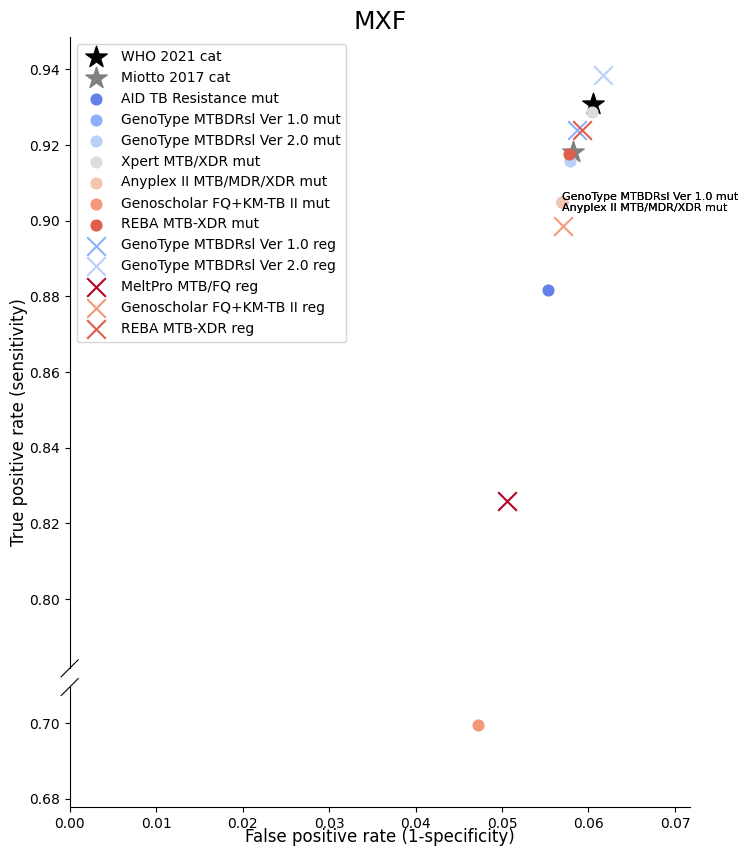

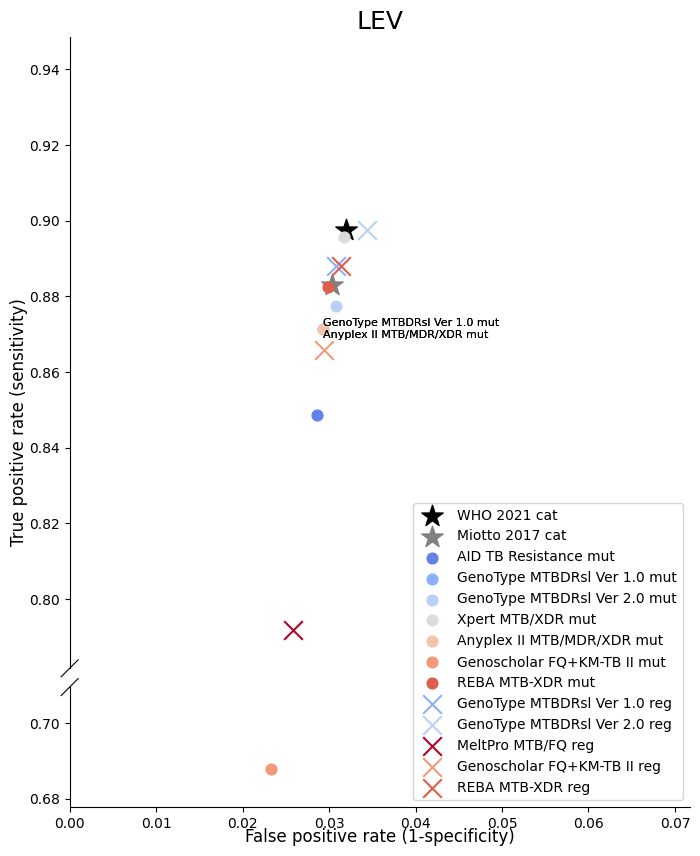

In [274]:
for i in ['MXF','LEV']:
    graph_df = results_df.loc[(results_df.Drug==i)&(results_df.Sensitivity>0)]
    plt.figure(figsize=(8,10))
    y=graph_df.Sensitivity.to_list()
    x=graph_df.Specificity.to_list()
    name=graph_df.Name.to_list()
    
    x_lim_df=results_df.loc[results_df.Specificity>0]
    y_lim_df=results_df.loc[results_df.Specificity>0]
    
    baxes = brokenaxes(ylims=((min(y_lim_df.Sensitivity.to_list())-0.01, sorted(set(y_lim_df.Sensitivity.to_list()))[1]+0.01),
                              (sorted(set(y_lim_df.Sensitivity.to_list()))[2]-0.01,max(y_lim_df.Sensitivity.to_list())+0.01)), hspace=.05)
    
    for v in range(len(y)):
        if graph_df.Mut_or_Reg.to_list()[v]=='region':
            baxes.scatter(1-x[v], y[v], color=colors_dict[name[v]], marker='x', s=180, label=name[v]+' reg')
        elif graph_df.Mut_or_Reg.to_list()[v]=='mut':
            baxes.scatter(1-x[v], y[v], color=colors_dict[name[v]], marker='.', s=240, label=name[v]+' mut')
        elif graph_df.Mut_or_Reg.to_list()[v]=='cat':
            baxes.scatter(1-x[v], y[v], color=cat_colours_dict[name[v]], marker='*', s=260, label=name[v]+' cat')

    baxes.set_xlim(0, 1-x_lim_df.Specificity.min()+0.01)

    baxes.set_title(i, size=18)
    #baxes.set_xticks(size=10)
    #baxes.set_yticks(size=10, rotation=0)
    baxes.set_xlabel('False positive rate (1-specificity)', size=12)
    baxes.set_ylabel('True positive rate (sensitivity)', size=12)
    if i=='MXF':
        baxes.legend(loc='upper left')
    else:
        baxes.legend(loc='lower right')
    for pos in ['right', 'top']: 
        plt.gca().spines[pos].set_visible(False) 
    
    texts=[]
    for l in range(len(y)):
        if len(graph_df.loc[(graph_df.Sensitivity==y[l])&(graph_df.Specificity==x[l])]) >=2:
            texts.append(name[l]+" "+graph_df.Mut_or_Reg.to_list()[l])
   
    for l in range(len(y)):
        if len(graph_df.loc[(graph_df.Sensitivity==y[l])&(graph_df.Specificity==x[l])]) >=2:      
            for j in range(len(texts)-1):
                if texts[j][-3:]==texts[j+1][-3:]:
                    baxes.text(1-x[l], y[l], texts[j]+"\n"+texts[j+1], size=8, 
                               verticalalignment='center', horizontalalignment='left')

    
    
    label=[]
   # for l in range(len(x)):
    #    label.append(graph_df.Name.to_list()[l]+' ('+labels_dict[name[l]]+') '+graph_df.Mut_or_Reg.to_list()[l])
    #print(label)
    #if i=='MXF':
     #   plt.legend(x, labels=label, prop={'size': 7}, loc='upper left')
    #else:
      #  plt.legend(x, labels=label, prop={'size': 7}, loc='best')
        
    plt.savefig(i+'_test_sens&spec_het.png', dpi=300, transparent=True, bbox_inches='tight')

In [395]:
results_df

,Drug,Name,No_R,No_S,R_mut,S_mut,Sensitivity,Specificity,Mut_or_Reg
0,MXF,WHO 2021,1724,10470,1437,548,0.833527,0.947660,cat
1,MXF,Miotto 2017,1724,10470,1415,525,0.820766,0.949857,cat
2,LEV,WHO 2021,2146,10017,1721,268,0.801957,0.973245,cat
3,LEV,Miotto 2017,2146,10017,1689,255,0.787046,0.974543,cat
4,MXF,AID TB Resistance,1724,10470,1358,504,0.787703,0.951862,mut
5,MXF,GenoType MTBDRsl Ver 1.0,1724,10470,1392,514,0.807425,0.950907,mut
6,MXF,GenoType MTBDRsl Ver 2.0,1724,10470,1411,522,0.818445,0.950143,mut
7,MXF,Xpert MTB/XDR,1724,10470,1433,548,0.831206,0.947660,mut
8,MXF,Anyplex II MTB/MDR/XDR,1724,10470,1392,514,0.807425,0.950907,mut
9,MXF,Genoscholar FQ+KM-TB II,1724,10470,1082,431,0.627610,0.958835,mut


In [ ]:
#test performance by country/lineage
#ppv/npv by different prevalence e.g. 30% MDR could be FQR, in Ind/Pak/Nep 70%, <1% 1st line susceptible TB is FQ R

In [681]:
def lineage_cat_performance(data, drug_code, catalogue_name):
    r_data=data.loc[(data.DRUG==drug_code)&(data.BINARY_PHENOTYPE=='R')]
    r_samples=r_data.UNIQUEID.nunique()
    print(r_samples)
    s_data=data.loc[(data.DRUG==drug_code)&(data.BINARY_PHENOTYPE=='S')]
    s_samples=s_data.UNIQUEID.nunique()
    print(s_samples)
    cat_df=catalogue_mutations.loc[catalogue_mutations.Catalogue==catalogue_name]
    r_mutations = r_data.loc[r_data.geneXmutation.isin(cat_df.geneXmutation.to_list())].UNIQUEID.nunique()
    s_mutations = s_data.loc[s_data.geneXmutation.isin(cat_df.geneXmutation.to_list())].UNIQUEID.nunique()
    sens=r_mutations/r_data.UNIQUEID.nunique()
    spec=(s_data.UNIQUEID.nunique()-s_mutations)/s_data.UNIQUEID.nunique()
    prev=r_samples/(r_samples+s_samples)
    ppv_data=sens*prev/sens*prev+(1-spec)*(1-prev)
    npv_data=spec*(1-prev)/((1-sens)*prev+spec*(1-prev))
    df = pd.DataFrame([{'Drug':drug_code,'Name':catalogue_name, 
                       'No_R':r_samples, 'No_S':s_samples,
                       'R_mut':r_mutations,'S_mut':s_mutations,
                       'Sensitivity':sens, 'Specificity':spec, 'Mut_or_Reg':'cat',
                       'Prevalence':prev,'PPV':ppv_data, 'NPV':npv_data}])
    return df

In [682]:
def lineage_list_performance(data, drug_code, test_name, mut_or_region):
    

    t_data = test_mutations.loc[(test_mutations.Test==test_name)&(test_mutations.Drug==drug_code)]
    
    r_data=data.loc[(data.DRUG==drug_code)&(data.BINARY_PHENOTYPE=='R')]
    s_data=data.loc[(data.DRUG==drug_code)&(data.BINARY_PHENOTYPE=='S')]
    r_samples=r_data.UNIQUEID.nunique()
    s_samples=s_data.UNIQUEID.nunique()
    
    r_mutation_df=pd.DataFrame()
    s_mutation_df=pd.DataFrame()
    r_mutation_df = r_mutation_df.append(r_data.loc[((r_data.geneXmutation.notna())&(r_data.geneXmutation.isin(t_data['geneXmutation'].to_list())))])
    s_mutation_df = s_mutation_df.append(s_data.loc[((s_data.geneXmutation.notna())&(s_data.geneXmutation.isin(t_data['geneXmutation'].to_list())))])

    if mut_or_region=='region':
        s_mutation_df = s_mutation_df.append(s_data.loc[((s_data.geneXposition.notna())&(s_data.geneXposition.isin(t_data['geneXposition'].to_list())))
                                                        &(s_data.IS_HET==False)
                                                        &(s_data.IS_FILTER_PASS==True)
                                                        &(s_data.IS_NULL==False)
                                                        &(-s_data.MUTATION.isin(t_data['Susceptible'].dropna().to_list()))])
        r_mutation_df = r_mutation_df.append(r_data.loc[((r_data.geneXposition.notna())&(r_data.geneXposition.isin(t_data['geneXposition'].to_list())))
                                                        &(r_data.IS_HET==False)
                                                        &(r_data.IS_FILTER_PASS==True)
                                                        &(r_data.IS_NULL==False)
                                                        &(-r_data.MUTATION.isin(t_data['Susceptible'].dropna().to_list()))])            
#    if len(t_data.Susceptible.dropna().unique())>=1:
 #       r_mutation_df=r_mutation_df.loc[]
    print(test_name,drug_code, r_mutation_df.MUTATION.unique())
    r_mutations= r_mutation_df.UNIQUEID.nunique()    
    s_mutations= s_mutation_df.UNIQUEID.nunique()
    sens=r_mutations/r_data.UNIQUEID.nunique()
    spec=(s_data.UNIQUEID.nunique()-s_mutations)/s_data.UNIQUEID.nunique()
    
    prev=r_samples/(r_samples+s_samples)
    ppv_data=sens*prev/sens*prev+(1-spec)*(1-prev)
    npv_data=spec*(1-prev)/((1-sens)*prev+spec*(1-prev))
    df = pd.DataFrame([{'Drug':drug_code,'Name':test_name, 
                       'No_R':r_samples, 'No_S':s_samples,
                       'R_mut':r_mutations,'S_mut':s_mutations,
                       'Sensitivity':sens, 'Specificity':spec, 'Mut_or_Reg':mut_or_region,
                       'Prevalence':prev,'PPV':ppv_data, 'NPV':npv_data}])
    return df

In [683]:
lineages=['Lineage 1','Lineage 2', 'Lineage 3', 'Lineage 4']
for l in lineages:  
    results_df=pd.DataFrame()
    lineage_df=pmg.loc[pmg.LINEAGE_NAME==l]
    for i in lineage_df.DRUG.unique():
        for j in catalogue_mutations.Catalogue.unique():
            results_df=results_df.append(lineage_cat_performance(lineage_df,i,j))
        
    region_test_data=test_mutations.loc[test_mutations.Region.notna()]
    mutation_test_data=test_mutations.loc[test_mutations.Mutation.notna()]
    for i in mutation_test_data.Drug.unique():
        for j in mutation_test_data.loc[mutation_test_data.Drug==i].Test.unique():
            results_df=results_df.append(lineage_list_performance(lineage_df,i, j, 'mut'))

    for i in region_test_data.Drug.unique():
        for j in region_test_data.loc[region_test_data.Drug==i].Test.unique():
            results_df=results_df.append(lineage_list_performance(lineage_df,i, j, 'region'))
    results_df.reset_index(drop=True, inplace=True)
    results_df.to_csv('in_silico_diagnostic_test_results_'+l+'.csv')

60
622
60
622
37
645
37
645
AID TB Resistance MXF ['A90V' 'D94G' 'D94A']
GenoType MTBDRsl Ver 1.0 MXF ['A90V' 'D94G' 'D94A']
GenoType MTBDRsl Ver 2.0 MXF ['A90V' 'D94G' 'D94A']
Xpert MTB/XDR MXF ['A90V' 'D94G' 'D94A']
Anyplex II MTB/MDR/XDR MXF ['A90V' 'D94G' 'D94A']
Genoscholar FQ+KM-TB II MXF ['A90V' 'D94G' 'D94A']
REBA MTB-XDR MXF ['A90V' 'D94G' 'D94A']
AID TB Resistance LEV ['A90V' 'D94G' 'D94A']
GenoType MTBDRsl Ver 1.0 LEV ['A90V' 'D94G' 'D94A']
GenoType MTBDRsl Ver 2.0 LEV ['A90V' 'D94G' 'D94A']
Xpert MTB/XDR LEV ['A90V' 'D94G' 'D94A' 'D461N']
Anyplex II MTB/MDR/XDR LEV ['A90V' 'D94G' 'D94A']
Genoscholar FQ+KM-TB II LEV ['A90V' 'D94G' 'D94A']
REBA MTB-XDR LEV ['A90V' 'D94G' 'D94A']
GenoType MTBDRsl Ver 1.0 LEV ['A90V' 'D94G' 'D94A']
GenoType MTBDRsl Ver 2.0 LEV ['A90V' 'D94G' 'D94A']
MeltPro MTB/FQ LEV ['A90V' 'D94G' 'D94A']
Genoscholar FQ+KM-TB II LEV ['A90V' 'D94G' 'D94A']
REBA MTB-XDR LEV ['A90V' 'D94G' 'D94A']
GenoType MTBDRsl Ver 1.0 MXF ['A90V' 'D94G' 'D94A']
GenoType MTBD

In [684]:
countries=['PAK','IND', 'ZAF', 'CHN','PER']
for c in countries:  
    results_df=pd.DataFrame()
    country_df=pmgs.loc[(pmgs.COUNTRY_WHERE_SAMPLE_TAKEN==c)&(pmgs.UNIQUEID.isin(mdr_phenotypes))]
    for i in country_df.DRUG.unique():
        for j in catalogue_mutations.Catalogue.unique():
            results_df=results_df.append(lineage_cat_performance(country_df,i,j))
        
    region_test_data=test_mutations.loc[test_mutations.Region.notna()]
    mutation_test_data=test_mutations.loc[test_mutations.Mutation.notna()]
    for i in mutation_test_data.Drug.unique():
        for j in mutation_test_data.loc[mutation_test_data.Drug==i].Test.unique():
            results_df=results_df.append(lineage_list_performance(country_df,i, j, 'mut'))

    for i in region_test_data.Drug.unique():
        for j in region_test_data.loc[region_test_data.Drug==i].Test.unique():
            results_df=results_df.append(lineage_list_performance(country_df,i, j, 'region'))
    results_df.reset_index(drop=True, inplace=True)
    results_df.to_csv('in_silico_diagnostic_test_results_'+c+'.csv')

188
199
188
199
105
281
105
281
AID TB Resistance MXF ['D94G' 'D94Y' 'D94N' 'A90V' 'D94A' 'S91P']
GenoType MTBDRsl Ver 1.0 MXF ['D94G' 'D94Y' 'D94N' 'A90V' 'D94H' 'D94A' 'S91P']
GenoType MTBDRsl Ver 2.0 MXF ['D94G' 'D94Y' 'D94N' 'A90V' 'D94H' 'D94A' 'S91P']
Xpert MTB/XDR MXF ['D94G' 'D94Y' 'D94N' 'A90V' 'D94H' 'D94A' 'S91P']
Anyplex II MTB/MDR/XDR MXF ['D94G' 'D94Y' 'D94N' 'A90V' 'D94H' 'D94A' 'S91P']
Genoscholar FQ+KM-TB II MXF ['D94G' 'A90V' 'D94A']
REBA MTB-XDR MXF ['D94G' 'D94Y' 'D94N' 'A90V' 'D94H' 'D94A' 'S91P']
AID TB Resistance LEV ['D94N' 'D94A' 'A90V' 'D94G' 'S91P' 'D94Y']
GenoType MTBDRsl Ver 1.0 LEV ['D94N' 'D94A' 'A90V' 'D94G' 'S91P' 'D94Y' 'D94H']
GenoType MTBDRsl Ver 2.0 LEV ['D94N' 'D94A' 'A90V' 'D94G' 'S91P' 'D94Y' 'D94H']
Xpert MTB/XDR LEV ['D94N' 'D94A' 'A90V' 'D94G' 'S91P' 'D94Y' 'D94H' 'G88C']
Anyplex II MTB/MDR/XDR LEV ['D94N' 'D94A' 'A90V' 'D94G' 'S91P' 'D94Y' 'D94H']
Genoscholar FQ+KM-TB II LEV ['D94A' 'A90V' 'D94G']
REBA MTB-XDR LEV ['D94N' 'D94A' 'A90V' 'D94G'

Genoscholar FQ+KM-TB II MXF ['D94A' 'D94G' 'A90V']
REBA MTB-XDR MXF ['D94Y' 'D94A' 'D94G' 'A90V' 'D94N' 'S91P' 'G88C' 'D94H']
AID TB Resistance LEV ['D94N' 'A90V' 'S91P' 'D94G' 'D94A' 'D94Y']
GenoType MTBDRsl Ver 1.0 LEV ['D94N' 'A90V' 'S91P' 'D94G' 'D94A' 'D94Y' 'D94H']
GenoType MTBDRsl Ver 2.0 LEV ['D94N' 'A90V' 'S91P' 'D94G' 'D94A' 'E501D' 'D94Y' 'D94H']
Xpert MTB/XDR LEV ['D94N' 'A90V' 'S91P' 'D94G' 'D94A' 'E501D' 'G88C' 'D94Y' 'D94H' 'D461N']
Anyplex II MTB/MDR/XDR LEV ['D94N' 'A90V' 'S91P' 'D94G' 'D94A' 'D94Y' 'D94H']
Genoscholar FQ+KM-TB II LEV ['A90V' 'D94G' 'D94A']
REBA MTB-XDR LEV ['D94N' 'A90V' 'S91P' 'D94G' 'D94A' 'G88C' 'D94Y' 'D94H']
GenoType MTBDRsl Ver 1.0 LEV ['D94N' 'A90V' 'S91P' 'D94G' 'D94A' 'D94Y' 'D94H' 'G88C' 'D89N']
GenoType MTBDRsl Ver 2.0 LEV ['D94N' 'A90V' 'S91P' 'D94G' 'D94A' 'E501D' 'D94Y' 'D94H' 'T500N' 'G88C'
 'D89N' 'N499K']
MeltPro MTB/FQ LEV ['D94N' 'A90V' 'S91P' 'D94G' 'D94A' 'G88C' 'D94Y' 'D89N' 'D94H']
Genoscholar FQ+KM-TB II LEV ['A90V' 'D94G' 'D94

In [685]:
ind_df=pd.read_csv('in_silico_diagnostic_test_results_IND.csv')
ind_df

,Unnamed: 0,Drug,Name,No_R,No_S,R_mut,S_mut,Sensitivity,Specificity,Mut_or_Reg,Prevalence,PPV,NPV
0,0,MXF,WHO 2021,462,305,419,90,0.906926,0.704918,cat,0.602347,0.480162,0.833333
1,1,MXF,Miotto 2017,462,305,417,84,0.902597,0.724590,cat,0.602347,0.472339,0.830827
2,2,LEV,WHO 2021,521,248,455,55,0.873321,0.778226,cat,0.677503,0.530532,0.745174
3,3,LEV,Miotto 2017,521,248,450,52,0.863724,0.790323,cat,0.677503,0.526631,0.734082
4,4,MXF,AID TB Resistance,462,305,408,83,0.883117,0.727869,mut,0.602347,0.471035,0.804348
5,5,MXF,GenoType MTBDRsl Ver 1.0,462,305,414,84,0.896104,0.724590,mut,0.602347,0.472339,0.821561
6,6,MXF,GenoType MTBDRsl Ver 2.0,462,305,416,86,0.900433,0.718033,mut,0.602347,0.474947,0.826415
7,7,MXF,Xpert MTB/XDR,462,305,421,94,0.911255,0.691803,mut,0.602347,0.485377,0.837302
8,8,MXF,Anyplex II MTB/MDR/XDR,462,305,414,84,0.896104,0.724590,mut,0.602347,0.472339,0.821561
9,9,MXF,Genoscholar FQ+KM-TB II,462,305,345,72,0.746753,0.763934,mut,0.602347,0.456694,0.665714


In [686]:
per_df=pd.read_csv('in_silico_diagnostic_test_results_PER.csv')
per_df

,Unnamed: 0,Drug,Name,No_R,No_S,R_mut,S_mut,Sensitivity,Specificity,Mut_or_Reg,Prevalence,PPV,NPV
0,0,MXF,WHO 2021,119,726,86,17,0.722689,0.976584,cat,0.140828,0.039951,0.955526
1,1,MXF,Miotto 2017,119,726,83,15,0.697479,0.979339,cat,0.140828,0.037584,0.951807
2,2,LEV,WHO 2021,139,707,98,7,0.705036,0.990099,cat,0.164303,0.035270,0.944669
3,3,LEV,Miotto 2017,139,707,94,6,0.676259,0.991513,cat,0.164303,0.034088,0.939678
4,4,MXF,AID TB Resistance,119,726,78,15,0.655462,0.979339,mut,0.140828,0.037584,0.945479
5,5,MXF,GenoType MTBDRsl Ver 1.0,119,726,79,15,0.663866,0.979339,mut,0.140828,0.037584,0.946738
6,6,MXF,GenoType MTBDRsl Ver 2.0,119,726,82,15,0.689076,0.979339,mut,0.140828,0.037584,0.950535
7,7,MXF,Xpert MTB/XDR,119,726,86,17,0.722689,0.976584,mut,0.140828,0.039951,0.955526
8,8,MXF,Anyplex II MTB/MDR/XDR,119,726,79,15,0.663866,0.979339,mut,0.140828,0.037584,0.946738
9,9,MXF,Genoscholar FQ+KM-TB II,119,726,59,15,0.495798,0.979339,mut,0.140828,0.037584,0.922179


In [687]:
zaf_df=pd.read_csv('in_silico_diagnostic_test_results_ZAF.csv')
zaf_df

,Unnamed: 0,Drug,Name,No_R,No_S,R_mut,S_mut,Sensitivity,Specificity,Mut_or_Reg,Prevalence,PPV,NPV
0,0,MXF,WHO 2021,259,387,222,25,0.857143,0.935401,cat,0.400929,0.199444,0.907268
1,1,MXF,Miotto 2017,259,387,216,21,0.833977,0.945736,cat,0.400929,0.193252,0.894866
2,2,LEV,WHO 2021,276,363,236,10,0.855072,0.972452,cat,0.431925,0.202209,0.898219
3,3,LEV,Miotto 2017,276,363,228,9,0.826087,0.975207,cat,0.431925,0.200644,0.880597
4,4,MXF,AID TB Resistance,259,387,196,20,0.756757,0.948320,mut,0.400929,0.191704,0.853488
5,5,MXF,GenoType MTBDRsl Ver 1.0,259,387,210,20,0.810811,0.948320,mut,0.400929,0.191704,0.882212
6,6,MXF,GenoType MTBDRsl Ver 2.0,259,387,216,21,0.833977,0.945736,mut,0.400929,0.193252,0.894866
7,7,MXF,Xpert MTB/XDR,259,387,221,25,0.853282,0.935401,mut,0.400929,0.199444,0.905000
8,8,MXF,Anyplex II MTB/MDR/XDR,259,387,210,20,0.810811,0.948320,mut,0.400929,0.191704,0.882212
9,9,MXF,Genoscholar FQ+KM-TB II,259,387,159,20,0.613900,0.948320,mut,0.400929,0.191704,0.785867


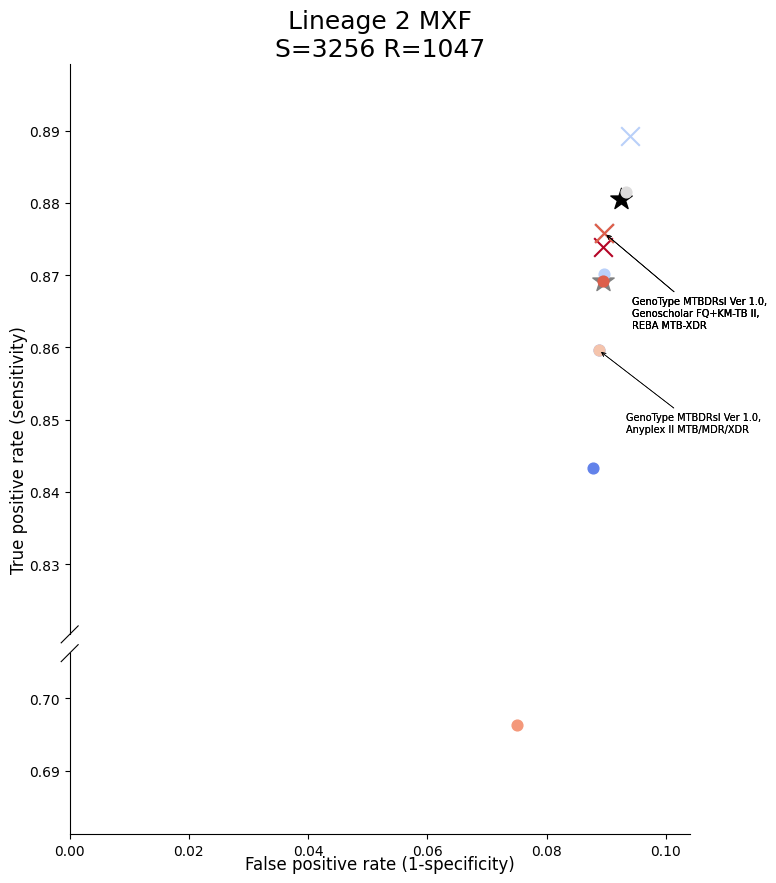

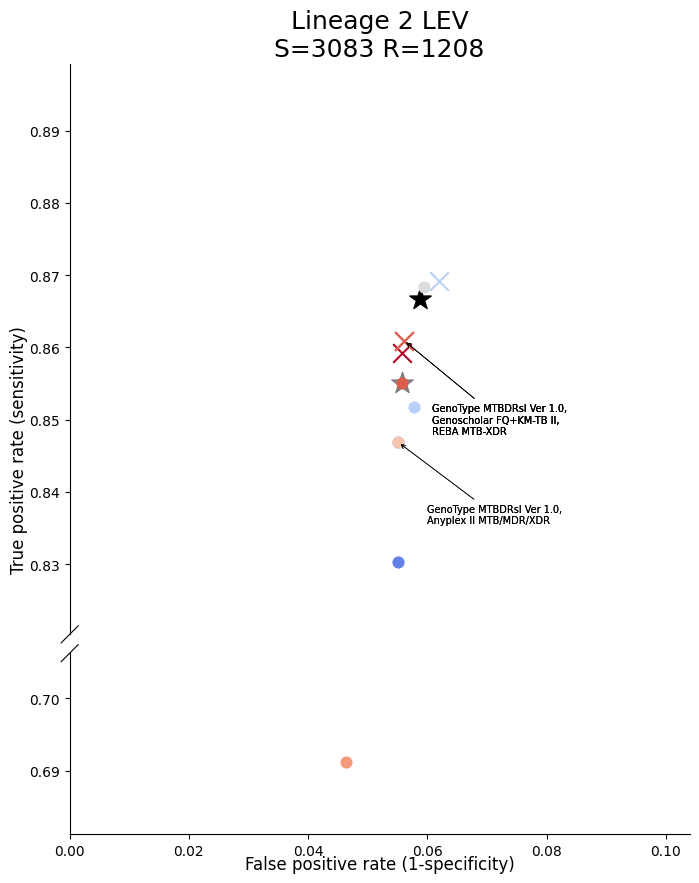

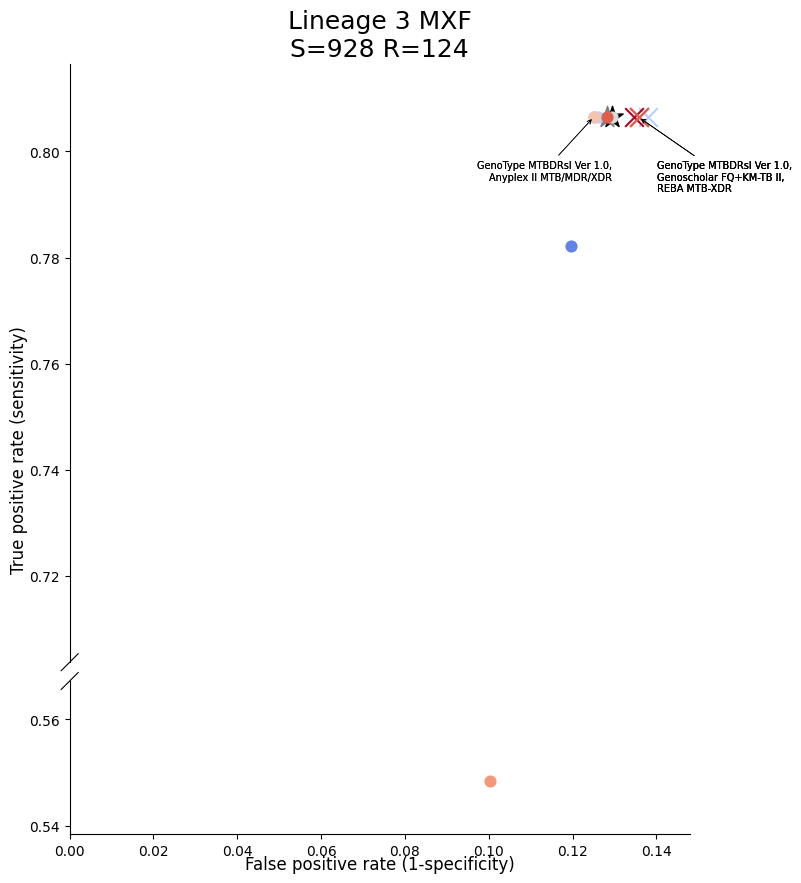

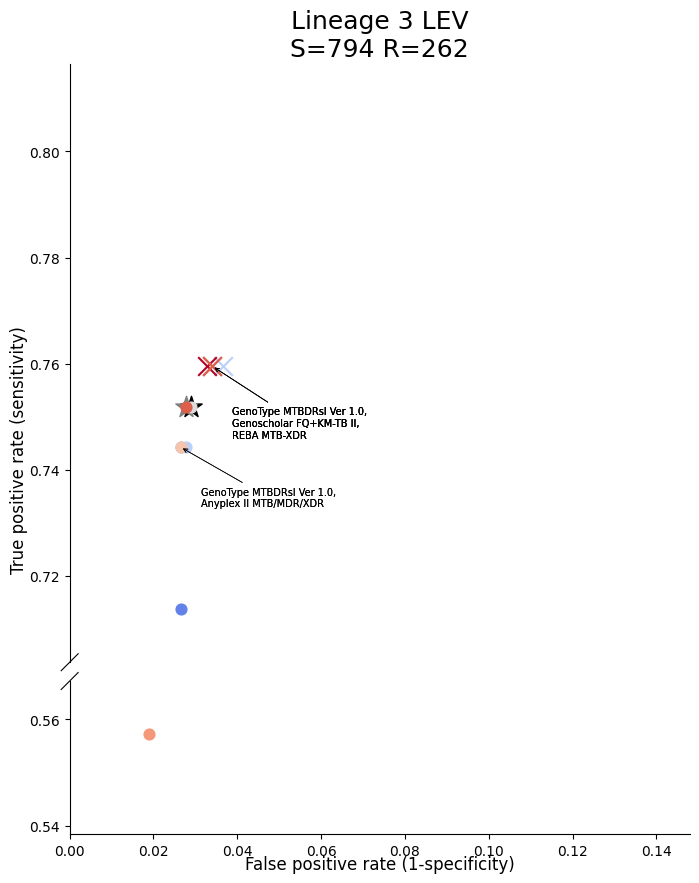

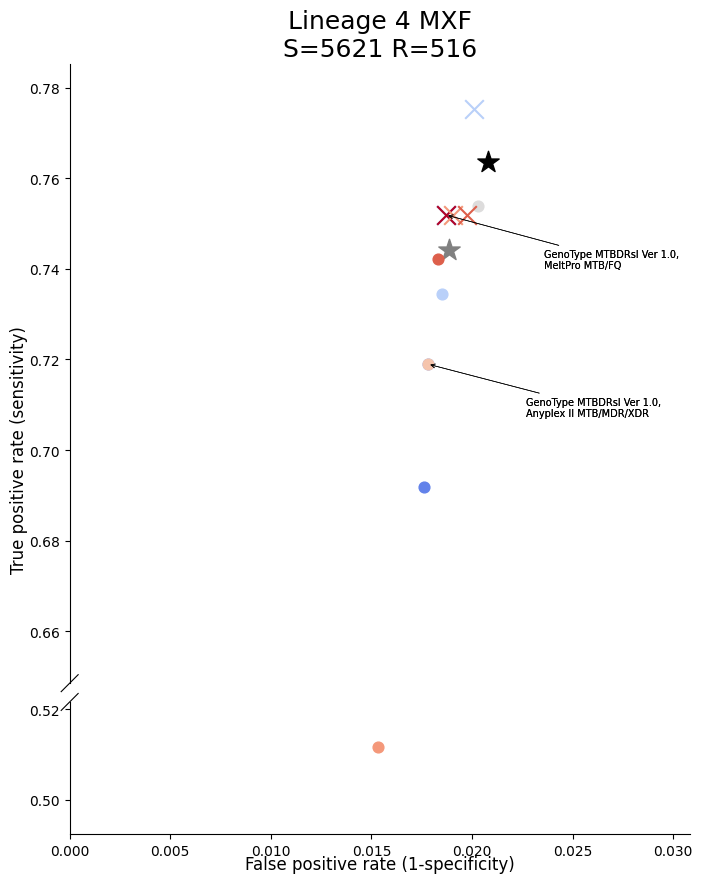

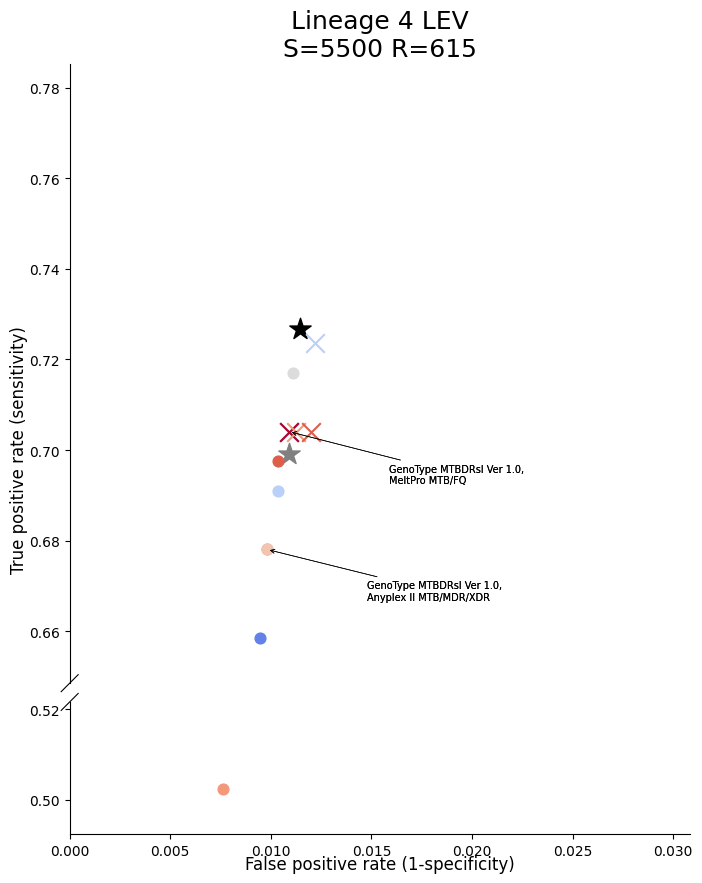

In [497]:
for l in ['Lineage 2','Lineage 3','Lineage 4']:
    for i in ['MXF','LEV']:
        results_df=pd.read_csv('in_silico_diagnostic_test_results_'+l+'.csv')
        graph_df = results_df.loc[(results_df.Drug==i)&(results_df.Sensitivity>0)]
        graph_df['NameCat']=graph_df['Name']+' '+graph_df['Mut_or_Reg']
        plt.figure(figsize=(8,10))
        y=graph_df.Sensitivity.to_list()
        x=graph_df.Specificity.to_list()
        name=graph_df.Name.to_list()
    
        x_lim_df=results_df.loc[results_df.Specificity>0]
        y_lim_df=results_df.loc[results_df.Specificity>0]
    
        baxes = brokenaxes(ylims=((min(y_lim_df.Sensitivity.to_list())-0.01, 
                                   sorted(set(y_lim_df.Sensitivity.to_list()))[1]+0.01),
                                  (sorted(set(y_lim_df.Sensitivity.to_list()))[2]-0.01,
                                   max(y_lim_df.Sensitivity.to_list())+0.01)), hspace=.05)
    
        for v in range(len(y)):
            if graph_df.Mut_or_Reg.to_list()[v]=='region':
                baxes.scatter(1-x[v], y[v], color=colors_dict[name[v]], marker='x', s=180, label=name[v]+' reg')
            elif graph_df.Mut_or_Reg.to_list()[v]=='mut':
                baxes.scatter(1-x[v], y[v], color=colors_dict[name[v]], marker='.', s=240, label=name[v]+' mut')
            elif graph_df.Mut_or_Reg.to_list()[v]=='cat':
                baxes.scatter(1-x[v], y[v], color=cat_colours_dict[name[v]], marker='*', s=260, label=name[v]+' cat')

        baxes.set_xlim(0, 1-x_lim_df.Specificity.min()+0.01)
        
        baxes.set_title(l+' '+i+"\nS="+str(graph_df.No_S.to_list()[0])+" R="+str(graph_df.No_R.to_list()[0]), size=18)
        #baxes.set_xticks(size=10)
        #baxes.set_yticks(size=10, rotation=0)
        baxes.set_xlabel('False positive rate (1-specificity)', size=12)
        baxes.set_ylabel('True positive rate (sensitivity)', size=12)
        #if i=='MXF':
         #   baxes.legend(loc='upper left')
        #else:
         #   baxes.legend(loc='best')
        for pos in ['right', 'top']: 
            plt.gca().spines[pos].set_visible(False) 
    
        texts=[]
        x_count=[]
        for t in range(len(y)):
            if y.count(y[t])>1 and x.count(x[t])>1 and len(graph_df.loc[(graph_df.Sensitivity==y[t])&(graph_df.Specificity==x[t])&(graph_df.Mut_or_Reg!='cat')].NameCat.to_list())>1: 
                labels=graph_df.loc[(graph_df.Sensitivity==y[t])&(graph_df.Specificity==x[t])].Name.to_list()
                string=labels[0]
                for lab in range(1,len(labels)):
                    string=string+',\n'+labels[lab]
                if i=='MXF' and l=='Lineage 3' and string=='GenoType MTBDRsl Ver 1.0,\nGenoscholar FQ+KM-TB II,\nREBA MTB-XDR':
                    baxes.annotate(string,xy=(1-x[t], y[t]), size=7,  xytext=(1-x[t]*0.995, y[t]*0.99),
                               verticalalignment='top', horizontalalignment='left',arrowprops=dict(arrowstyle="->",lw=0.5))
                
                elif i=='MXF' and l=='Lineage 3' and string!='GenoType MTBDRsl Ver 1.0,\nGenoscholar FQ+KM-TB II,\nREBA MTB-XDR':
                    baxes.annotate(string,xy=(1-x[t], y[t]), size=7, xytext=(1-x[t]*0.995, y[t]*0.99),
                               verticalalignment='top', horizontalalignment='right',arrowprops=dict(arrowstyle="->",lw=0.5))
                    
                elif i=='MXF' and l!='Lineage 3':
                    baxes.annotate(string,xy=(1-x[t], y[t]), size=7, xytext=(1-x[t]*0.995, y[t]*0.99),
                               verticalalignment='top', horizontalalignment='left',arrowprops=dict(arrowstyle="->",lw=0.5))
                elif i=='LEV':
                    baxes.annotate(string,xy=(1-x[t], y[t]), size=7, xytext=(1-x[t]*0.995, y[t]*0.99),
                               verticalalignment='top', horizontalalignment='left',arrowprops=dict(arrowstyle="->",lw=0.5))

    
    
        label=[]
   # for l in range(len(x)):
    #    label.append(graph_df.Name.to_list()[l]+' ('+labels_dict[name[l]]+') '+graph_df.Mut_or_Reg.to_list()[l])
    #print(label)
    #if i=='MXF':
     #   plt.legend(x, labels=label, prop={'size': 7}, loc='upper left')
    #else:
      #  plt.legend(x, labels=label, prop={'size': 7}, loc='best')
        
        plt.savefig(l+'_'+i+'_test_sens&spec_v2.png', dpi=300, transparent=True, bbox_inches='tight')

In [498]:
graph_df

,Unnamed: 0,Drug,Name,No_R,No_S,R_mut,S_mut,Sensitivity,Specificity,Mut_or_Reg,NameCat
2,2,LEV,WHO 2021,615,5500,447,63,0.726829,0.988545,cat,WHO 2021 cat
3,3,LEV,Miotto 2017,615,5500,430,60,0.699187,0.989091,cat,Miotto 2017 cat
11,11,LEV,AID TB Resistance,615,5500,405,52,0.658537,0.990545,mut,AID TB Resistance mut
12,12,LEV,GenoType MTBDRsl Ver 1.0,615,5500,417,54,0.678049,0.990182,mut,GenoType MTBDRsl Ver 1.0 mut
13,13,LEV,GenoType MTBDRsl Ver 2.0,615,5500,425,57,0.691057,0.989636,mut,GenoType MTBDRsl Ver 2.0 mut
14,14,LEV,Xpert MTB/XDR,615,5500,441,61,0.717073,0.988909,mut,Xpert MTB/XDR mut
15,15,LEV,Anyplex II MTB/MDR/XDR,615,5500,417,54,0.678049,0.990182,mut,Anyplex II MTB/MDR/XDR mut
16,16,LEV,Genoscholar FQ+KM-TB II,615,5500,309,42,0.502439,0.992364,mut,Genoscholar FQ+KM-TB II mut
17,17,LEV,REBA MTB-XDR,615,5500,429,57,0.697561,0.989636,mut,REBA MTB-XDR mut
18,18,LEV,GenoType MTBDRsl Ver 1.0,615,5500,433,60,0.704065,0.989091,region,GenoType MTBDRsl Ver 1.0 region


In [286]:
pmh.loc[(pmh.geneXmutation=='gyrAc-34t')&(pmh.DRUG=='MXF')].BINARY_PHENOTYPE.value_counts()

S    134
R      9
I      0
Name: BINARY_PHENOTYPE, dtype: int64

In [287]:
pmh.loc[(pmh.geneXmutation=='gyrAc-34t')&(pmh.DRUG=='LEV')].BINARY_PHENOTYPE.value_counts()

S    124
R     19
I      0
Name: BINARY_PHENOTYPE, dtype: int64

In [284]:
pmh.loc[(pmh.geneXmutation=='gyrAD89N')&(pmh.DRUG=='MXF')].BINARY_PHENOTYPE.value_counts()

R    13
S     3
I     0
Name: BINARY_PHENOTYPE, dtype: int64

In [285]:
pmh.loc[(pmh.geneXmutation=='gyrAD89N')&(pmh.DRUG=='LEV')].BINARY_PHENOTYPE.value_counts()

R    8
S    8
I    0
Name: BINARY_PHENOTYPE, dtype: int64

In [80]:
lev_s=pmh.loc[(pmh.DRUG=='LEV')&(pmh.BINARY_PHENOTYPE=='S')&(pmh.PHENOTYPE_QUALITY!='LOW')].UNIQUEID.nunique()
lev_r=pmh.loc[(pmh.DRUG=='LEV')&(pmh.BINARY_PHENOTYPE=='R')&(pmh.PHENOTYPE_QUALITY!='LOW')].UNIQUEID.nunique()
lev_s_het=pmh.loc[(pmh.DRUG=='LEV')&(pmh.BINARY_PHENOTYPE=='S')&(pmh.PHENOTYPE_QUALITY!='LOW')&((-pmh.HET_1.isna())|(-pmh.HET_2.isna())|(-pmh.HET_3.isna())|(-pmh.HET_4.isna()))].UNIQUEID.nunique()
lev_r_het=pmh.loc[(pmh.DRUG=='LEV')&(pmh.BINARY_PHENOTYPE=='R')&(pmh.PHENOTYPE_QUALITY!='LOW')&((-pmh.HET_1.isna())|(-pmh.HET_2.isna())|(-pmh.HET_3.isna())|(-pmh.HET_4.isna()))].UNIQUEID.nunique()

In [81]:
lev_r_het_prop=lev_r_het/lev_r
lev_r_het_prop

0.3431066749844042

In [82]:
lev_s_het_prop=lev_s_het/lev_s
lev_s_het_prop

0.22485049833887044

In [83]:
mxf_s=pmh.loc[(pmh.DRUG=='MXF')&(pmh.BINARY_PHENOTYPE=='S')&(pmh.PHENOTYPE_QUALITY!='LOW')].UNIQUEID.nunique()
mxf_r=pmh.loc[(pmh.DRUG=='MXF')&(pmh.BINARY_PHENOTYPE=='R')&(pmh.PHENOTYPE_QUALITY!='LOW')].UNIQUEID.nunique()
mxf_s_het=pmh.loc[(pmh.DRUG=='MXF')&(pmh.BINARY_PHENOTYPE=='S')&(pmh.PHENOTYPE_QUALITY!='LOW')&((-pmh.HET_1.isna())|(-pmh.HET_2.isna())|(-pmh.HET_3.isna())|(-pmh.HET_4.isna()))].UNIQUEID.nunique()
mxf_r_het=pmh.loc[(pmh.DRUG=='MXF')&(pmh.BINARY_PHENOTYPE=='R')&(pmh.PHENOTYPE_QUALITY!='LOW')&((-pmh.HET_1.isna())|(-pmh.HET_2.isna())|(-pmh.HET_3.isna())|(-pmh.HET_4.isna()))].UNIQUEID.nunique()

In [84]:
pmh.loc[(pmh.DRUG=='MXF')&(pmh.BINARY_PHENOTYPE=='R')
        &((-pmh.HET_1.isna())|(-pmh.HET_2.isna())|(-pmh.HET_3.isna())|(-pmh.HET_4.isna()))
        &(pmh.UNIQUEID.isin(mdr_phenotypes))].UNIQUEID.nunique()

NameError: name 'mdr_phenotypes' is not defined

In [85]:
pmh.loc[(pmh.DRUG=='MXF')&(pmh.BINARY_PHENOTYPE=='R')
        &((-pmh.HET_1.isna())|(-pmh.HET_2.isna())|(-pmh.HET_3.isna())|(-pmh.HET_4.isna()))
        &(-pmh.UNIQUEID.isin(mdr_phenotypes))].UNIQUEID.nunique()

NameError: name 'mdr_phenotypes' is not defined

In [86]:
pmh.loc[(pmh.DRUG=='MXF')&(pmh.BINARY_PHENOTYPE=='R')&(pmh.UNIQUEID.isin(mdr_phenotypes))].UNIQUEID.nunique()

NameError: name 'mdr_phenotypes' is not defined

In [87]:
pmh.loc[(pmh.DRUG=='MXF')&(pmh.BINARY_PHENOTYPE=='R')&(-pmh.UNIQUEID.isin(mdr_phenotypes))].UNIQUEID.nunique()

NameError: name 'mdr_phenotypes' is not defined

In [88]:
mxf_r_het_prop=mxf_r_het/mxf_r
mxf_r_het_prop

0.3149546827794562

In [89]:
mxf_s_het_prop=mxf_s_het/mxf_s
mxf_s_het_prop

0.23569122395068975

In [90]:
import statsmodels
from statsmodels.stats.proportion import proportions_ztest

def z_test(sample_success_a, sample_size_a, sample_success_b, sample_size_b):
    # can we assume anything from our sample
    significance = 0.025

    # check our sample against Ho for Ha != Ho
    successes = np.array([sample_success_a, sample_success_b])
    samples = np.array([sample_size_a, sample_size_b])
    # note, no need for a Ho value here - it's derived from the other parameters
    stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')
    # report
    print('z_stat: %0.5f, p_value: %0.5f' % (stat, p_value))
    if p_value > significance:
        print ("Fail to reject the null hypothesis - we have nothing else to say")
    else:
        print ("Reject the null hypothesis - suggest the alternative hypothesis is true")
    return p_value

In [91]:
z_test(lev_s_het,lev_s, lev_r_het,lev_r)

z_stat: -9.98689, p_value: 0.00000
Reject the null hypothesis - suggest the alternative hypothesis is true


1.7395053739948167e-23

In [1]:
#plt.bar(unique(mut_counts).astype('str'),counts)
fig, ax = plt.subplots(figsize=(4,4))
labels = ['LEV','MXF']
#FQ = fq_r_lineage_prev.FQ_R/fq_r_lineage_prev.FQ_TOTAL*100
R = [lev_r_het_prop*100, mxf_r_het_prop*100]
S = [lev_s_het_prop*100, mxf_s_het_prop*100]

lev_z=z_test(lev_s_het,lev_s, lev_r_het,lev_r)
print(lev_z)
mxf_z=z_test(mxf_s_het,mxf_s, mxf_r_het,mxf_r)

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars


#rects1 = ax.bar(x - width, FQ, width, label='Fluoroquinolone Resistant', color='#bc5090',edgecolor='k')
rects2 = ax.bar(x - width/2, S, width, label='Susceptible', color='blue', edgecolor='black')
rects3 = ax.bar(x + width/2, R, width, label='Resistant', color='red',edgecolor='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% Isolates with Evidence of \nMixed Alleles in DNA Gyrase')
ax.set_xticks(x)
ax.set_ylim(0,100)
ax.bar_label(rects2, fmt='%.1f', label_type='center')
ax.bar_label(rects3, fmt='%.1f', label_type='center')
    
if lev_z<=0.05:
    plt.plot([x[0]-width/2, x[0]+width/2], [R[0]+4, R[0]+4],color="k")
    plt.plot([x[0]-width/2, x[0]-width/2], [S[0]+2, R[0]+4],color="k")
    plt.plot([x[0]+width/2, x[0]+width/2], [R[0]+2, R[0]+4],color="k")
if mxf_z<=0.05:
    plt.plot([x[1]-width/2, x[1]+width/2], [R[1]+4, R[1]+4],color="k")
    plt.plot([x[1]-width/2, x[1]-width/2], [S[1]+2, R[1]+4],color="k")
    plt.plot([x[1]+width/2, x[1]+width/2], [R[1]+2, R[1]+4],color="k")

for pos in ['right', 'top']: 
        plt.gca().spines[pos].set_visible(False) 
ax.set_xticklabels(labels)
ax.legend(loc='upper right')

plt.savefig('hets_RvsS.png',dpi=300, transparent=True, bbox_inches='tight')

NameError: name 'plt' is not defined

In [479]:
no_hets_results_df = pd.DataFrame()
for i in pm.DRUG.unique():
    for j in catalogue_mutations.Catalogue.unique():
        no_hets_results_df=no_hets_results_df.append(no_het_cat_performance(i,j))

no_hets_results_df.reset_index(drop=True, inplace=True) 
no_hets_results_df

1724
10470
1724
10470
2146
10017
2146
10017


,Drug,Name,No_R,No_S,R_mut,S_mut,Sensitivity,Specificity,Mut_or_Reg,PPV_0.14138100705264883,PPV_1%,PPV_30%,PPV_40%,NPV,NPV_1%,NPV_30%,NPV_40%,PPV_0.17643673435829976
0,MXF,WHO 2021,1724,10470,1437,548,0.833527,0.947660,cat_no_het,0.723929,0.156456,0.847660,0.881221,0.971888,0.998229,0.929985,0.895166,NaN
1,MXF,Miotto 2017,1724,10470,1415,525,0.820766,0.949857,cat_no_het,0.729381,0.160113,0.851170,0.884064,0.969865,0.998098,0.925181,0.888259,NaN
2,LEV,WHO 2021,2146,10017,1721,268,0.801957,0.973245,cat_no_het,NaN,0.266842,0.916100,0.935727,0.958227,0.997949,0.919787,0.880547,0.865259
3,LEV,Miotto 2017,2146,10017,1689,255,0.787046,0.974543,cat_no_het,NaN,0.272942,0.918448,0.937563,0.955279,0.997798,0.914369,0.872846,0.868827


In [480]:
who_no_het_results=no_hets_results_df.loc[no_hets_results_df.Name=='WHO 2021']
who_no_het_results

,Drug,Name,No_R,No_S,R_mut,S_mut,Sensitivity,Specificity,Mut_or_Reg,PPV_0.14138100705264883,PPV_1%,PPV_30%,PPV_40%,NPV,NPV_1%,NPV_30%,NPV_40%,PPV_0.17643673435829976
0,MXF,WHO 2021,1724,10470,1437,548,0.833527,0.947660,cat_no_het,0.723929,0.156456,0.84766,0.881221,0.971888,0.998229,0.929985,0.895166,NaN
2,LEV,WHO 2021,2146,10017,1721,268,0.801957,0.973245,cat_no_het,NaN,0.266842,0.91610,0.935727,0.958227,0.997949,0.919787,0.880547,0.865259


In [481]:
who_het_results=results_df.loc[results_df.Name=='WHO 2021']
who_het_results

,Drug,Name,No_R,No_S,R_mut,S_mut,Sensitivity,Specificity,Mut_or_Reg,PPV_0.14138100705264883,PPV_1%,PPV_30%,PPV_40%,NPV,NPV_1%,NPV_30%,NPV_40%,PPV_0.17643673435829976
0,MXF,WHO 2021,1724,10470,1605,634,0.930974,0.939446,cat,0.716838,0.151866,0.843057,0.877486,0.988046,0.999258,0.969472,0.953304,NaN
2,LEV,WHO 2021,2146,10017,1926,320,0.897484,0.968054,cat,NaN,0.254359,0.910983,0.931718,0.977816,0.998931,0.956585,0.934056,0.857524


In [482]:
who_het_results.Sensitivity*100

0    93.097448
2    89.748369
Name: Sensitivity, dtype: float64

In [488]:
who_het_results.Sensitivity[2]

0.8974836905871388

z_stat: -8.87667, p_value: 0.00000
Reject the null hypothesis - suggest the alternative hypothesis is true
z_stat: -8.75661, p_value: 0.00000
Reject the null hypothesis - suggest the alternative hypothesis is true


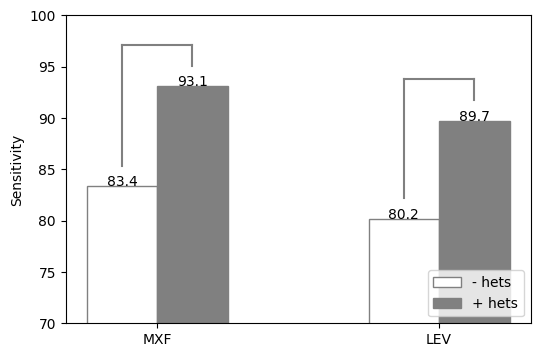

In [536]:
#plt.bar(unique(mut_counts).astype('str'),counts)
fig, ax = plt.subplots(figsize=(6,4))
labels = ['MXF','LEV']
#FQ = fq_r_lineage_prev.FQ_R/fq_r_lineage_prev.FQ_TOTAL*100
H = who_het_results.Sensitivity*100
H=H.to_list()
NH = who_no_het_results.Sensitivity*100
NH=NH.to_list()


mxf_z=z_test(who_no_het_results.R_mut[0],who_no_het_results.No_R[0], who_het_results.R_mut[0],who_het_results.No_R[0])
lev_z=z_test(who_no_het_results.R_mut[2],who_no_het_results.No_R[2], who_het_results.R_mut[2],who_het_results.No_R[2])



x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars


#rects1 = ax.bar(x - width, FQ, width, label='Fluoroquinolone Resistant', color='#bc5090',edgecolor='k')
rects2 = ax.bar(x - width/2, NH, width, label='- hets', color='w', edgecolor='gray')
rects3 = ax.bar(x + width/2, H, width, label='+ hets', color='gray',edgecolor='gray')

for i in [0,1]:
    ax.text(x[i] - width/2, NH[i], str(round(NH[i],1)), ha='center')
    ax.text(x[i] + width/2, H[i], str(round(H[i],1)), ha='center')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sensitivity')
ax.set_xticks(x)
ax.set_ylim(70,100)
if mxf_z<=0.025:
    plt.plot([x[0]-width/2, x[0]+width/2], [H[0]+4, H[0]+4],color="gray")
    plt.plot([x[0]-width/2, x[0]-width/2], [NH[0]+2, H[0]+4],color="gray")
    plt.plot([x[0]+width/2, x[0]+width/2], [H[0]+2, H[0]+4],color="gray")
if lev_z<=0.025:
    plt.plot([x[1]-width/2, x[1]+width/2], [H[1]+4, H[1]+4],color="gray")
    plt.plot([x[1]-width/2, x[1]-width/2], [NH[1]+2, H[1]+4],color="gray")
    plt.plot([x[1]+width/2, x[1]+width/2], [H[1]+2, H[1]+4],color="gray")


ax.set_xticklabels(labels)
ax.legend(loc='lower right')

z_stat: 2.57517, p_value: 0.01002
Reject the null hypothesis - suggest the alternative hypothesis is true
z_stat: 2.17662, p_value: 0.02951
Fail to reject the null hypothesis - we have nothing else to say


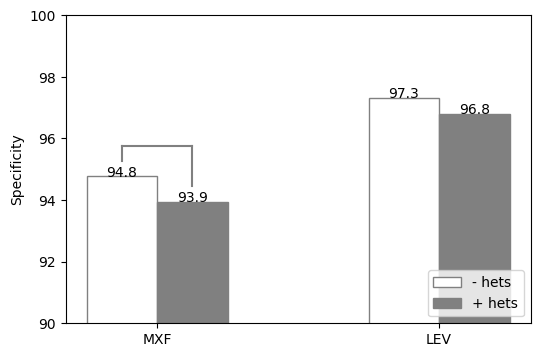

In [535]:
#plt.bar(unique(mut_counts).astype('str'),counts)
fig, ax = plt.subplots(figsize=(6,4))
labels = ['MXF','LEV']
#FQ = fq_r_lineage_prev.FQ_R/fq_r_lineage_prev.FQ_TOTAL*100
H = who_het_results.Specificity*100
H=H.to_list()
NH = who_no_het_results.Specificity*100
NH=NH.to_list()


mxf_z=z_test(who_no_het_results.No_S[0]-who_no_het_results.S_mut[0],who_no_het_results.No_S[0], 
             who_het_results.No_S[0]-who_het_results.S_mut[0],who_het_results.No_S[0])
lev_z=z_test(who_no_het_results.No_S[2]-who_no_het_results.S_mut[2],who_no_het_results.No_S[2], 
             who_het_results.No_S[2]-who_het_results.S_mut[2],who_het_results.No_S[2])



x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars


#rects1 = ax.bar(x - width, FQ, width, label='Fluoroquinolone Resistant', color='#bc5090',edgecolor='k')
rects2 = ax.bar(x - width/2, NH, width, label='- hets', color='w', edgecolor='gray')
rects3 = ax.bar(x + width/2, H, width, label='+ hets', color='gray',edgecolor='gray')
for i in [0,1]:
    ax.text(x[i] - width/2, NH[i], str(round(NH[i],1)), ha='center')
    ax.text(x[i] + width/2, H[i], str(round(H[i],1)), ha='center')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Specificity')
ax.set_xticks(x)
ax.set_ylim(90,100)
if mxf_z<=0.025:
    plt.plot([x[0]-width/2, x[0]+width/2], [NH[0]+1, NH[0]+1],color="gray")
    plt.plot([x[0]-width/2, x[0]-width/2], [NH[0]+0.5, NH[0]+1],color="gray")
    plt.plot([x[0]+width/2, x[0]+width/2], [H[0]+0.5, NH[0]+1],color="gray")
if lev_z<=0.025:
    plt.plot([x[1]-width/2, x[1]+width/2], [NH[1]+1, NH[1]+1],color="gray")
    plt.plot([x[1]-width/2, x[1]-width/2], [NH[1]+0.5, NH[1]+1],color="gray")
    plt.plot([x[1]+width/2, x[1]+width/2], [H[1]+0.5, NH[1]+1],color="gray")


ax.set_xticklabels(labels)
ax.legend(loc='lower right')

In [515]:
who_het_results.No_S[2]-who_no_het_results.S_mut[2]

9749

In [516]:
who_no_het_results.No_S[2]-who_no_het_results.S_mut[2]


9749

In [174]:
lev_s=pmh.loc[(pmh.DRUG=='LEV')&(pmh.BINARY_PHENOTYPE=='S')].UNIQUEID.nunique()
lev_r=pmh.loc[(pmh.DRUG=='LEV')&(pmh.BINARY_PHENOTYPE=='R')&(pmh.LINEAGE_NAME=='Lineage 2')].UNIQUEID.nunique()
lev_s_het=pmh.loc[(pmh.DRUG=='LEV')&(pmh.BINARY_PHENOTYPE=='S')&((-pmh.HET_1.isna())|(-pmh.HET_2.isna())|(-pmh.HET_3.isna())|(-pmh.HET_4.isna()))].UNIQUEID.nunique()
lev_r_het=pmh.loc[(pmh.LINEAGE_NAME=='Lineage 2')&(pmh.DRUG=='LEV')&(pmh.BINARY_PHENOTYPE=='R')&((-pmh.HET_1.isna())|(-pmh.HET_2.isna())|(-pmh.HET_3.isna())|(-pmh.HET_4.isna()))].UNIQUEID.nunique()

In [175]:
lev_r_het/lev_r

0.2947019867549669

In [178]:
lev_s=pmh.loc[(pmh.DRUG=='LEV')&(pmh.BINARY_PHENOTYPE=='S')].UNIQUEID.nunique()
lev_r=pmh.loc[(pmh.DRUG=='LEV')&(pmh.BINARY_PHENOTYPE=='R')&(pmh.LINEAGE_NAME=='Lineage 3')].UNIQUEID.nunique()
lev_s_het=pmh.loc[(pmh.DRUG=='LEV')&(pmh.BINARY_PHENOTYPE=='S')&((-pmh.HET_1.isna())|(-pmh.HET_2.isna())|(-pmh.HET_3.isna())|(-pmh.HET_4.isna()))].UNIQUEID.nunique()
lev_r_het=pmh.loc[(pmh.LINEAGE_NAME=='Lineage 3')&(pmh.DRUG=='LEV')&(pmh.BINARY_PHENOTYPE=='R')&((-pmh.HET_1.isna())|(-pmh.HET_2.isna())|(-pmh.HET_3.isna())|(-pmh.HET_4.isna()))].UNIQUEID.nunique()

In [179]:
lev_r_het/lev_r

0.5343511450381679

In [185]:
lev_s=pmh.loc[(pmh.DRUG=='LEV')&(pmh.BINARY_PHENOTYPE=='S')].UNIQUEID.nunique()
lev_r=pmh.loc[(pmh.DRUG=='LEV')&(pmh.BINARY_PHENOTYPE=='R')&(pmh.COUNTRY_WHERE_SAMPLE_TAKEN=='PAK')].UNIQUEID.nunique()
lev_s_het=pmh.loc[(pmh.DRUG=='LEV')&(pmh.BINARY_PHENOTYPE=='S')&((-pmh.HET_1.isna())|(-pmh.HET_2.isna())|(-pmh.HET_3.isna())|(-pmh.HET_4.isna()))].UNIQUEID.nunique()
lev_r_het=pmh.loc[(pmh.COUNTRY_WHERE_SAMPLE_TAKEN=='PAK')&(pmh.DRUG=='LEV')&(pmh.BINARY_PHENOTYPE=='R')&((-pmh.HET_1.isna())|(-pmh.HET_2.isna())|(-pmh.HET_3.isna())|(-pmh.HET_4.isna()))].UNIQUEID.nunique()

In [186]:
lev_r_het/lev_r

0.6634615384615384

In [187]:
lev_s=pmh.loc[(pmh.DRUG=='LEV')&(pmh.BINARY_PHENOTYPE=='S')].UNIQUEID.nunique()
lev_r=pmh.loc[(pmh.DRUG=='LEV')&(pmh.BINARY_PHENOTYPE=='R')&(pmh.COUNTRY_WHERE_SAMPLE_TAKEN=='ZAF')].UNIQUEID.nunique()
lev_s_het=pmh.loc[(pmh.DRUG=='LEV')&(pmh.BINARY_PHENOTYPE=='S')&((-pmh.HET_1.isna())|(-pmh.HET_2.isna())|(-pmh.HET_3.isna())|(-pmh.HET_4.isna()))].UNIQUEID.nunique()
lev_r_het=pmh.loc[(pmh.COUNTRY_WHERE_SAMPLE_TAKEN=='ZAF')&(pmh.DRUG=='LEV')&(pmh.BINARY_PHENOTYPE=='R')&((-pmh.HET_1.isna())|(-pmh.HET_2.isna())|(-pmh.HET_3.isna())|(-pmh.HET_4.isna()))].UNIQUEID.nunique()

In [188]:
lev_r_het/lev_r

0.1815068493150685

In [191]:
countries=['CHN','IND','NPL','PAK','PER','ZAF']
lineages=['Lineage 1', 'Lineage 2', 'Lineage 3', 'Lineage 4']
drug=['LEV','MXF']
import itertools
a = [countries,lineages,drug]
combos=list(itertools.product(*a))
combos

[('CHN', 'Lineage 1', 'LEV'),
 ('CHN', 'Lineage 1', 'MXF'),
 ('CHN', 'Lineage 2', 'LEV'),
 ('CHN', 'Lineage 2', 'MXF'),
 ('CHN', 'Lineage 3', 'LEV'),
 ('CHN', 'Lineage 3', 'MXF'),
 ('CHN', 'Lineage 4', 'LEV'),
 ('CHN', 'Lineage 4', 'MXF'),
 ('IND', 'Lineage 1', 'LEV'),
 ('IND', 'Lineage 1', 'MXF'),
 ('IND', 'Lineage 2', 'LEV'),
 ('IND', 'Lineage 2', 'MXF'),
 ('IND', 'Lineage 3', 'LEV'),
 ('IND', 'Lineage 3', 'MXF'),
 ('IND', 'Lineage 4', 'LEV'),
 ('IND', 'Lineage 4', 'MXF'),
 ('NPL', 'Lineage 1', 'LEV'),
 ('NPL', 'Lineage 1', 'MXF'),
 ('NPL', 'Lineage 2', 'LEV'),
 ('NPL', 'Lineage 2', 'MXF'),
 ('NPL', 'Lineage 3', 'LEV'),
 ('NPL', 'Lineage 3', 'MXF'),
 ('NPL', 'Lineage 4', 'LEV'),
 ('NPL', 'Lineage 4', 'MXF'),
 ('PAK', 'Lineage 1', 'LEV'),
 ('PAK', 'Lineage 1', 'MXF'),
 ('PAK', 'Lineage 2', 'LEV'),
 ('PAK', 'Lineage 2', 'MXF'),
 ('PAK', 'Lineage 3', 'LEV'),
 ('PAK', 'Lineage 3', 'MXF'),
 ('PAK', 'Lineage 4', 'LEV'),
 ('PAK', 'Lineage 4', 'MXF'),
 ('PER', 'Lineage 1', 'LEV'),
 ('PER', '

In [196]:
countries=['CHN','IND','NPL','PAK','PER','ZAF']
lineages=['Lineage 1', 'Lineage 2', 'Lineage 3', 'Lineage 4']
drug=['LEV','MXF']
import itertools
a = [countries,lineages,drug]
combos=list(itertools.product(*a))

c = []
l = []
drug = []
n = []
d = []
p = []

for i in combos:
    if len(pmh.loc[(pmh.LINEAGE_NAME==i[1])&(pmh.COUNTRY_WHERE_SAMPLE_TAKEN==i[0])&(pmh.DRUG==i[2])&(pmh.BINARY_PHENOTYPE=='R')&(pmh.UNIQUEID.isin(mdr_phenotypes))])>0:
        prop=pmh.loc[((-pmh.HET_1.isna())|(-pmh.HET_2.isna())|(-pmh.HET_3.isna())|(-pmh.HET_4.isna()))&
                                        (pmh.LINEAGE_NAME==i[1])&
                                         (pmh.COUNTRY_WHERE_SAMPLE_TAKEN==i[0])&
                                          (pmh.DRUG==i[2])&
                                          (pmh.BINARY_PHENOTYPE=='R')
                                          &(pmh.UNIQUEID.isin(mdr_phenotypes))].UNIQUEID.nunique()/pmh.loc[(pmh.DRUG==i[2])&
                                                                                                (pmh.LINEAGE_NAME==i[1])&
                                                                                                (pmh.COUNTRY_WHERE_SAMPLE_TAKEN==i[0])&
                                                                                                (pmh.BINARY_PHENOTYPE=='R')
                                                                                                  &(pmh.UNIQUEID.isin(mdr_phenotypes))].UNIQUEID.nunique()
        c.append(i[0])
        l.append(i[1])
        drug.append(i[2])
        n.append(pmh.loc[((-pmh.HET_1.isna())|(-pmh.HET_2.isna())|(-pmh.HET_3.isna())|(-pmh.HET_4.isna()))&
                                        (pmh.LINEAGE_NAME==i[1])&
                                         (pmh.COUNTRY_WHERE_SAMPLE_TAKEN==i[0])&
                                          (pmh.DRUG==i[2])&
                                          (pmh.BINARY_PHENOTYPE=='R')
                                          &(pmh.UNIQUEID.isin(mdr_phenotypes))].UNIQUEID.nunique())
        d.append(pmh.loc[(pmh.DRUG==i[2])&(pmh.LINEAGE_NAME==i[1])&(pmh.COUNTRY_WHERE_SAMPLE_TAKEN==i[0])&(pmh.BINARY_PHENOTYPE=='R')
                            &(pmh.UNIQUEID.isin(mdr_phenotypes))].UNIQUEID.nunique())
        p.append(prop)
    else:
        c.append(i[0])
        l.append(i[1])
        drug.append(i[2])

        n.append(np.nan)
        d.append(np.nan)
        p.append(np.nan)
        
mut_analysis_df=pd.DataFrame(list(zip(c,l,drug,n,d,p)),
               columns =['COUNTRY', 'LINEAGE','DRUG', 'HET_TOTAL', 'TOTAL', 'PROPORTION_HET'])

In [221]:
mut_analysis_df

,COUNTRY,LINEAGE,DRUG,HET_TOTAL,TOTAL,PROPORTION_HET,PERCENT
0,CHN,Lineage 1,LEV,NaN,NaN,NaN,NaN
1,CHN,Lineage 1,MXF,NaN,NaN,NaN,NaN
2,CHN,Lineage 2,LEV,14.0,96.0,0.145833,14.583333
3,CHN,Lineage 2,MXF,14.0,86.0,0.162791,16.279070
4,CHN,Lineage 3,LEV,NaN,NaN,NaN,NaN
5,CHN,Lineage 3,MXF,NaN,NaN,NaN,NaN
6,CHN,Lineage 4,LEV,2.0,16.0,0.125000,12.500000
7,CHN,Lineage 4,MXF,1.0,14.0,0.071429,7.142857
8,IND,Lineage 1,LEV,5.0,20.0,0.250000,25.000000
9,IND,Lineage 1,MXF,4.0,13.0,0.307692,30.769231


In [205]:
import statsmodels
from statsmodels.stats.proportion import proportions_ztest
def z_test(sample_success_a, sample_size_a, sample_success_b, sample_size_b):
    # can we assume anything from our sample
    significance = 0.025

    # check our sample against Ho for Ha != Ho
    successes = np.array([sample_success_a, sample_success_b])
    samples = np.array([sample_size_a, sample_size_b])
    # note, no need for a Ho value here - it's derived from the other parameters
    stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')
    # report
    #print('z_stat: %0.5f, p_value: %0.5f' % (stat, p_value))
    #if p_value > significance:
        #print ("Fail to reject the null hypothesis - we have nothing else to say")
    #else:
        #print ("Reject the null hypothesis - suggest the alternative hypothesis is true")
    return p_value

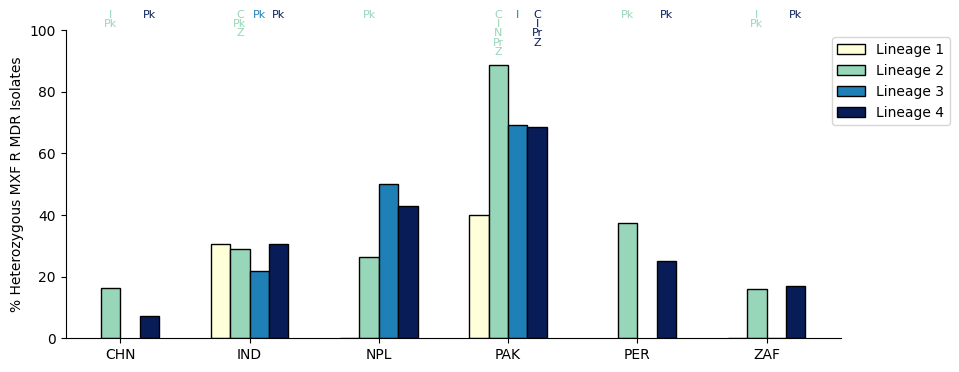

In [227]:

mut_analysis_df['PERCENT']= mut_analysis_df.PROPORTION_HET*100
width = 0.85  


labels = mut_analysis_df.COUNTRY.unique()


L1 = mut_analysis_df.loc[(mut_analysis_df.DRUG=='MXF')&(mut_analysis_df.LINEAGE=='Lineage 1')]
L2 = mut_analysis_df.loc[(mut_analysis_df.DRUG=='MXF')&(mut_analysis_df.LINEAGE=='Lineage 2')]
L3 = mut_analysis_df.loc[(mut_analysis_df.DRUG=='MXF')&(mut_analysis_df.LINEAGE=='Lineage 3')]
L4 = mut_analysis_df.loc[(mut_analysis_df.DRUG=='MXF')&(mut_analysis_df.LINEAGE=='Lineage 4')]

#x_labels=[]
#for i in labels:
#    x_labels.append(i + '\n N=' + str(int(mut_analysis_df.loc[(mut_analysis_df.COUNTRY==i)&(mut_analysis_df.DRUG=='MXF')].TOTAL.to_list()[0])))

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars
colors=['#ffffd9','#97d6b9','#1f80b8','#081d58']
widths=[x - width*1.5,x-width/2,x+width/2,x+width*1.5]
labels2=['C','I','N','Pk', 'Pr', 'Z']
fig, ax = plt.subplots(figsize=(10,4))
rects1 = ax.bar(x - width*1.5, L1.PERCENT, width, label='Lineage 1', color='#ffffd9',edgecolor='k')
rects2 = ax.bar(x - width/2, L2.PERCENT, width, label='Lineage 2', color='#97d6b9',edgecolor='k')
rects3 = ax.bar(x+width/2, L3.PERCENT, width, label='Lineage 3', color='#1f80b8',edgecolor='k')
rects4 = ax.bar(x + width*1.5, L4.PERCENT, width, label='Lineage 4', color='#081d58',edgecolor='k')


count=0
for mut in [L1,L2,L3,L4]:
    count=count+1
    
    for i in range(len(mut.HET_TOTAL)):
        count2=0
        ilist = list(range(len(mut.HET_TOTAL)))

        ilist.remove(i)

    
        for ii in ilist:
    
            if z_test(mut.HET_TOTAL.to_list()[i], mut.TOTAL.to_list()[i], mut.HET_TOTAL.to_list()[ii], mut.TOTAL.to_list()[ii]) <0.025:
                if count2==0:
                    plt.text(widths[count-1][i], 105-1,labels2[ii], color=colors[count-1], ha='center', size=8)
                    #plt.text(widths[count-1][ii], mut.PERCENT.to_list()[ii],labels[i], color=colors[count-1], ha='center')
                else:
                    plt.text(widths[count-1][i], 105-1-(count2*4-count2),labels2[ii], color=colors[count-1], ha='center', size=8)
                    #plt.text(widths[count-1][ii], mut.PERCENT.to_list()[ii]+count2*3,labels[i], color=colors[count-1], ha='center')
                count2=count2+1
                
count=0
for c in labels:
    count=count+1
    label_df=mut_analysis_df.loc[(mut_analysis_df.COUNTRY==c)&(mut_analysis_df.DRUG=='MXF')]

    for i in range(len(label_df.HET_TOTAL)):
        count2=0
        ilist = list(range(len(label_df.HET_TOTAL)))

        ilist.remove(i)

    
        for ii in ilist:
    
            if z_test(label_df.HET_TOTAL.to_list()[i], label_df.TOTAL.to_list()[i], label_df.HET_TOTAL.to_list()[ii], label_df.TOTAL.to_list()[ii]) <0.025:
                print('Y', label_df.COUNTRY.to_list()[i] ,label_df.MUTATION.to_list()[i], label_df.COUNTRY.to_list()[ii] ,label_df.MUTATION.to_list()[ii],[i],[ii], count)
                if count2==0:
                    plt.text(widths[i][count-1], label_df.PERCENT.to_list()[i]+0.5,'*', color=colors[ii], ha='center', size=10)
                    #plt.text(widths[count-1][ii], mut.PERCENT.to_list()[ii],labels[i], color=colors[count-1], ha='center')
                else:
                    plt.text(widths[i][count-1], label_df.PERCENT.to_list()[i]+0.5+(count2*2+1),'*', color=colors[ii], ha='center', size=10)
                    #plt.text(widths[count-1][ii], mut.PERCENT.to_list()[ii]+count2*3,labels[i], color=colors[count-1], ha='center')
                count2=count2+1
    

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% Heterozygous MXF R MDR Isolates')
ax.set_xticks(x)
ax.set_ylim(0,100)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=[1.15,1])
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
plt.savefig('fq_r_countries_hets_mxf.png', dpi=300, transparent=True, bbox_inches='tight')

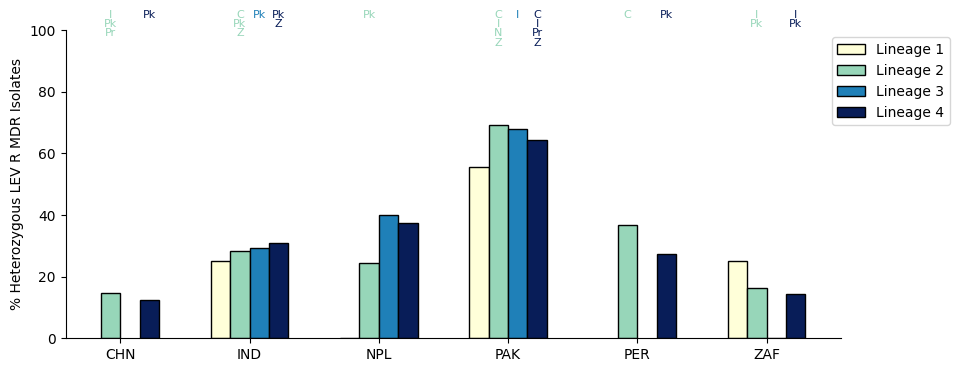

In [226]:

mut_analysis_df['PERCENT']= mut_analysis_df.PROPORTION_HET*100
width = 0.85  


labels = mut_analysis_df.COUNTRY.unique()


L1 = mut_analysis_df.loc[(mut_analysis_df.DRUG=='LEV')&(mut_analysis_df.LINEAGE=='Lineage 1')]
L2 = mut_analysis_df.loc[(mut_analysis_df.DRUG=='LEV')&(mut_analysis_df.LINEAGE=='Lineage 2')]
L3 = mut_analysis_df.loc[(mut_analysis_df.DRUG=='LEV')&(mut_analysis_df.LINEAGE=='Lineage 3')]
L4 = mut_analysis_df.loc[(mut_analysis_df.DRUG=='LEV')&(mut_analysis_df.LINEAGE=='Lineage 4')]

#x_labels=[]
#for i in labels:
#    x_labels.append(i + '\n N=' + str(int(mut_analysis_df.loc[(mut_analysis_df.COUNTRY==i)&(mut_analysis_df.DRUG=='MXF')].TOTAL.to_list()[0])))

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars
colors=['#ffffd9','#97d6b9','#1f80b8','#081d58']
widths=[x - width*1.5,x-width/2,x+width/2,x+width*1.5]
labels2=['C','I','N','Pk', 'Pr', 'Z']
fig, ax = plt.subplots(figsize=(10,4))
rects1 = ax.bar(x - width*1.5, L1.PERCENT, width, label='Lineage 1', color='#ffffd9',edgecolor='k')
rects2 = ax.bar(x - width/2, L2.PERCENT, width, label='Lineage 2', color='#97d6b9',edgecolor='k')
rects3 = ax.bar(x+width/2, L3.PERCENT, width, label='Lineage 3', color='#1f80b8',edgecolor='k')
rects4 = ax.bar(x + width*1.5, L4.PERCENT, width, label='Lineage 4', color='#081d58',edgecolor='k')


count=0
for mut in [L1,L2,L3,L4]:
    count=count+1
    
    for i in range(len(mut.HET_TOTAL)):
        count2=0
        ilist = list(range(len(mut.HET_TOTAL)))

        ilist.remove(i)

    
        for ii in ilist:
    
            if z_test(mut.HET_TOTAL.to_list()[i], mut.TOTAL.to_list()[i], mut.HET_TOTAL.to_list()[ii], mut.TOTAL.to_list()[ii]) <0.025:
                if count2==0:
                    plt.text(widths[count-1][i], 105-1,labels2[ii], color=colors[count-1], ha='center', size=8)
                    #plt.text(widths[count-1][ii], mut.PERCENT.to_list()[ii],labels[i], color=colors[count-1], ha='center')
                else:
                    plt.text(widths[count-1][i], 105-1-(count2*4-count2),labels2[ii], color=colors[count-1], ha='center', size=8)
                    #plt.text(widths[count-1][ii], mut.PERCENT.to_list()[ii]+count2*3,labels[i], color=colors[count-1], ha='center')
                count2=count2+1
                
count=0
for c in labels:
    count=count+1
    label_df=mut_analysis_df.loc[(mut_analysis_df.COUNTRY==c)&(mut_analysis_df.DRUG=='LEV')]

    for i in range(len(label_df.HET_TOTAL)):
        count2=0
        ilist = list(range(len(label_df.HET_TOTAL)))

        ilist.remove(i)

    
        for ii in ilist:
    
            if z_test(label_df.HET_TOTAL.to_list()[i], label_df.TOTAL.to_list()[i], label_df.HET_TOTAL.to_list()[ii], label_df.TOTAL.to_list()[ii]) <0.025:
                print('Y', label_df.COUNTRY.to_list()[i] ,label_df.MUTATION.to_list()[i], label_df.COUNTRY.to_list()[ii] ,label_df.MUTATION.to_list()[ii],[i],[ii], count)
                if count2==0:
                    plt.text(widths[i][count-1], label_df.PERCENT.to_list()[i]+0.5,'*', color=colors[ii], ha='center', size=10)
                    #plt.text(widths[count-1][ii], mut.PERCENT.to_list()[ii],labels[i], color=colors[count-1], ha='center')
                else:
                    plt.text(widths[i][count-1], label_df.PERCENT.to_list()[i]+0.5+(count2*2+1),'*', color=colors[ii], ha='center', size=10)
                    #plt.text(widths[count-1][ii], mut.PERCENT.to_list()[ii]+count2*3,labels[i], color=colors[count-1], ha='center')
                count2=count2+1
    

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% Heterozygous LEV R MDR Isolates')
ax.set_xticks(x)
ax.set_ylim(0,100)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=[1.15,1])
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
plt.savefig('fq_r_countries_hets_lev.png', dpi=300, transparent=True, bbox_inches='tight')

In [248]:
u=[]
hets=[]
for i in pmh.UNIQUEID.unique():
    for ii in pmh.loc[(pmh.UNIQUEID==i)&(-pmh.HET_1.isna())].HET_1.unique():
        if ii[4]!=ii[-1]:
            u.append(i)
            hets.append(ii)
    for ii in pmh.loc[(pmh.UNIQUEID==i)&(-pmh.HET_2.isna())].HET_2.unique():
        if ii[4]!=ii[-1]:
            u.append(i)
            hets.append(ii)
    for ii in pmh.loc[(pmh.UNIQUEID==i)&(-pmh.HET_3.isna())].HET_3.unique():
        if ii[4]!=ii[-1]:
            u.append(i)
            hets.append(ii)
    for ii in pmh.loc[(pmh.UNIQUEID==i)&(-pmh.HET_4.isna())].HET_4.unique():
        if ii[4]!=ii[-1]:
            u.append(i)
            hets.append(ii)

    
uid_hets_df=pd.DataFrame(list(zip(u,hets)),columns=['UNIQUEID','HETMUT'])
uid_hets_df.to_csv('het_mutations.csv')

In [231]:
pmh.UNIQUEID.unique()

array(['site.06.subj.06TB_1032.lab.06MIL2037.iso.1',
       'site.06.subj.06TB_0404.lab.06MIL1373.iso.1',
       'site.06.subj.SSM_0197-R.lab.06MIL0117.iso.1', ...,
       'site.10.subj.XD02435891.lab.XD02435891.iso.1',
       'site.11.subj.MDR054.lab.SWE-42.iso.1',
       'site.08.subj.02TB0896.lab.19235.iso.1'], dtype=object)